# Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import chain

# for reading and displaying images
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dset
from torch.utils.data import DataLoader

# models
from src.data.data_util import *
from src.models.resnet import *
from src.models.levakov_96 import *
from src.models.inception import *
from src.models.dinsdale import *

from src.training.run import *

from torch.optim import *
import torch.optim as optim
from torchsummary import summary

# CAM
from PIL import Image
from matplotlib.pyplot import imshow

from medcam import medcam

# Setups

## Load Configuration

In [2]:
from src.config import *

cfg = load_config()

## Load Model

## Default Settings

Default Settings

In [50]:
cfg.model_name = "vanilla_residual"
cfg.layers = [8, 16, 32, 64]
cfg.refresh()
model, device = load_model(cfg.model_name, verbose=False, cfg=cfg)
model.load_state_dict(
    torch.load(
        "./result/models/2021_03_23_1835_vanilla_residual\\vanilla_residual_ep95-100_sd42_mae6.407.pth"
    )
)

Model Vanilla_residual is selected.


<All keys matched successfully>

# Make Inference (attention maps)

In [51]:
model = medcam.inject(
    model,
    output_dir="attention_maps/33/",
    save_maps=True,
    retain_graph=True,
    layer="feature_extractor[3]",
    data_shape=(96, 96, 96),
)

In [52]:
cfg.rot90 = True
cfg.refresh()
train_dataset = DatasetPlus(cfg, augment=True)
sample_dl = DataLoader(train_dataset, batch_size=1)

x, y = next(iter(sample_dl))
x, y = x.to(device), y.to(device)

output = model.forward(x)

KeyError: 'feature_extractor[3]'

# Attention Maps

In [33]:
dset = MyDataset(cfg, augment=None, fold=None)
dataloader = DataLoader(dset, batch_size=2)

## Heatmap Viewer

In [40]:
def view_heatmap(idx=0, path=None, avg=False, layer=None, show=True, custom_title=None):

    if path is None:
        path = glob("./attention_maps/conv1/*.nii.gz")

    if avg:
        att = nib.load(path[0]).get_fdata()
        for maps in path[1:]:

            att += nib.load(maps).get_fdata()

        att /= len(path)
        title = (
            "Averaged Attention Map"
            if layer is None
            else f"Averaged Attention Map on {layer}"
        )

    else:
        att = nib.load(path[idx]).get_fdata()
        src = dset.data_files[idx].split("\\")[-1][:3]
        if src == "rec":
            src = "Oasis1"
        elif src == "sub":
            src = "Oasis3"

        title = (
            f"Attention Map for Index {idx}, from {src}"
            if layer is None
            else f"Attention Map for Index {idx} on {layer}"
        )

    if show:
        if custom_title is not None:
            title = custom_title
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
        fig.suptitle(title)

        x, y, z = att.shape
        sns.heatmap(att[x // 2, :, :], ax=axes[0])
        sns.heatmap(att[:, y // 2, :], ax=axes[1])
        sns.heatmap(att[:, :, z // 2], ax=axes[2])

    else:
        return att

In [41]:
attmaps = glob("./attention_maps/33//*.nii.gz")

In [42]:
attmaps

['./attention_maps/33/avgpool\\attention_map_0_0_0.nii.gz']

In [43]:
att = nib.load(attmaps[0]).get_fdata()

<AxesSubplot:>

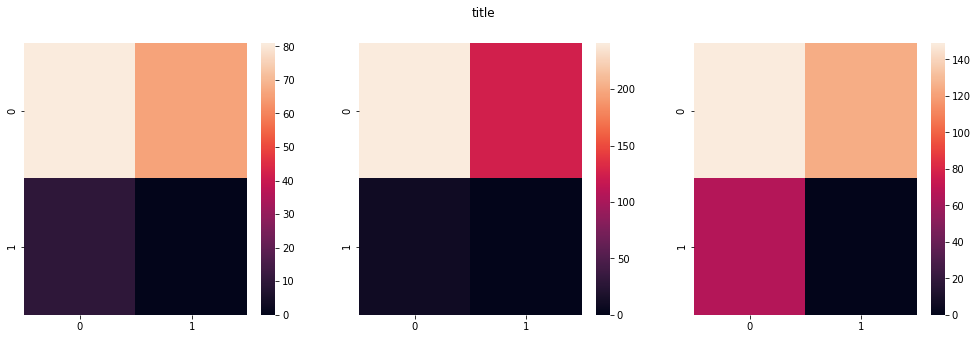

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
fig.suptitle("title")

x, y, z = att.shape
sns.heatmap(att[x // 2, :, :], ax=axes[0])
sns.heatmap(att[:, y // 2, :], ax=axes[1])
sns.heatmap(att[:, :, z // 2], ax=axes[2])

## Attention maps from 1st Conv Layer(conv1)

In [ ]:
view_heatmap(avg=True, path=path, custom_title="Averaged AttMap with GBP Backend")

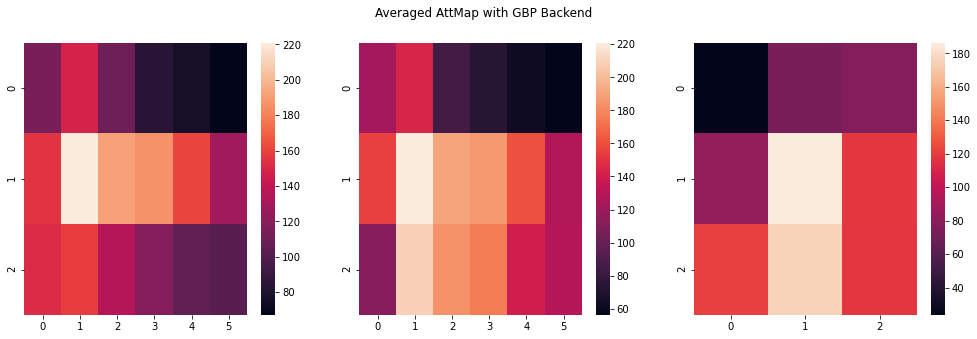

In [78]:
path = glob("./attention_maps/test/layer4/*.nii.gz")
view_heatmap(avg=True, path=path, custom_title="Averaged AttMap with GBP Backend")

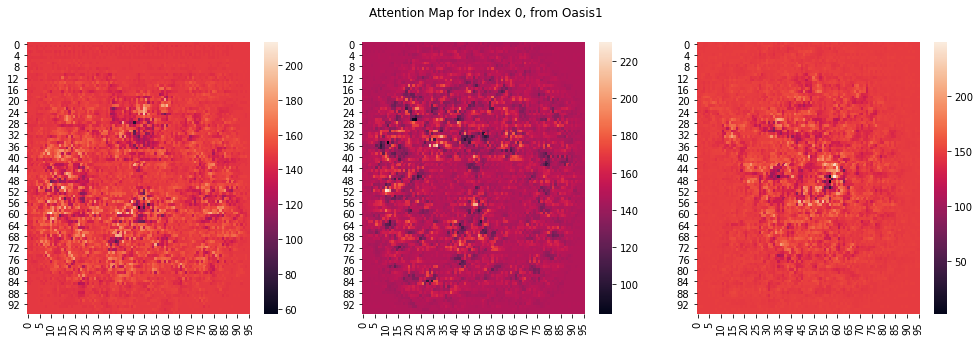

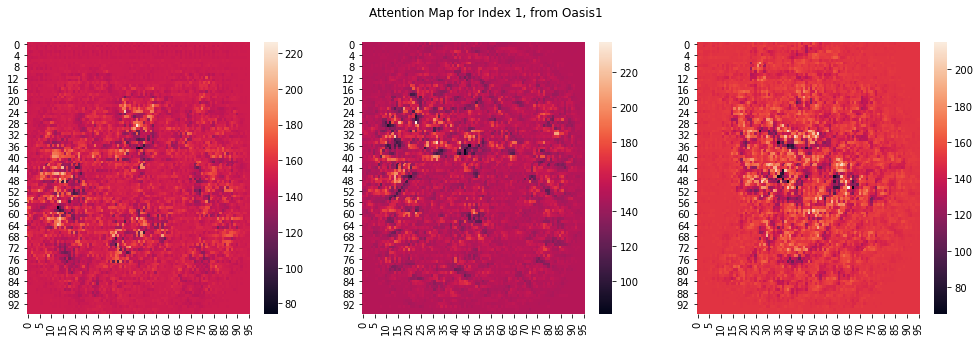

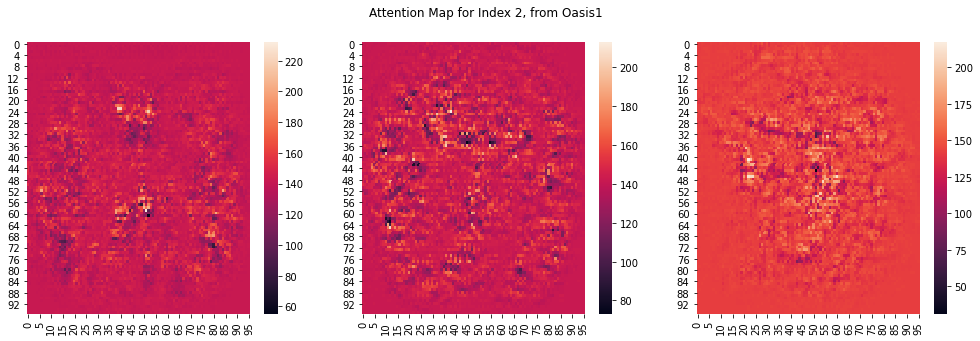

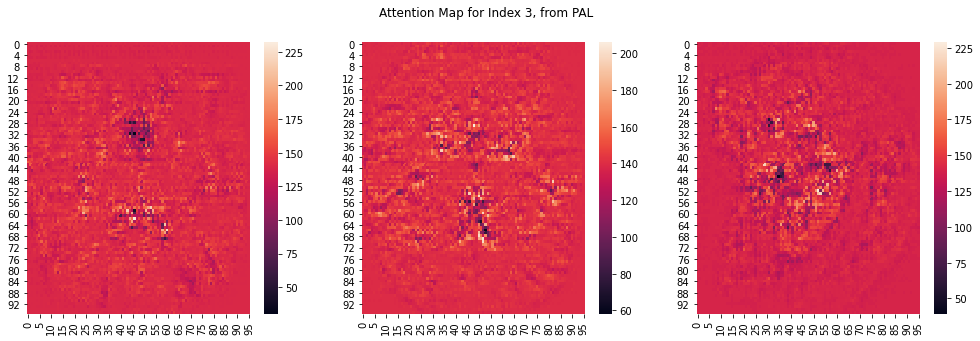

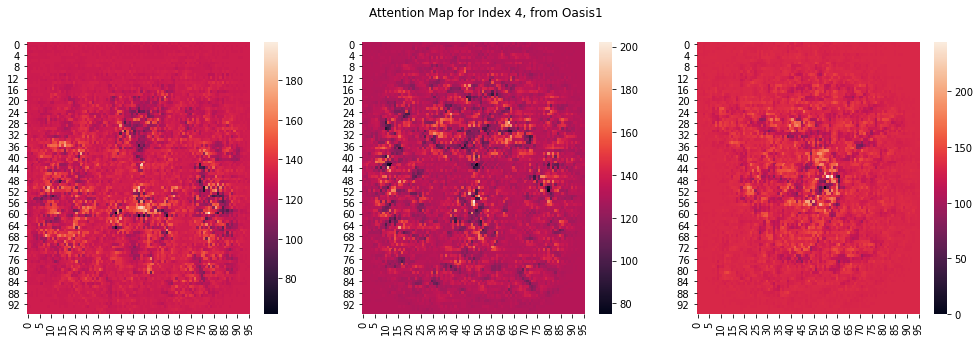

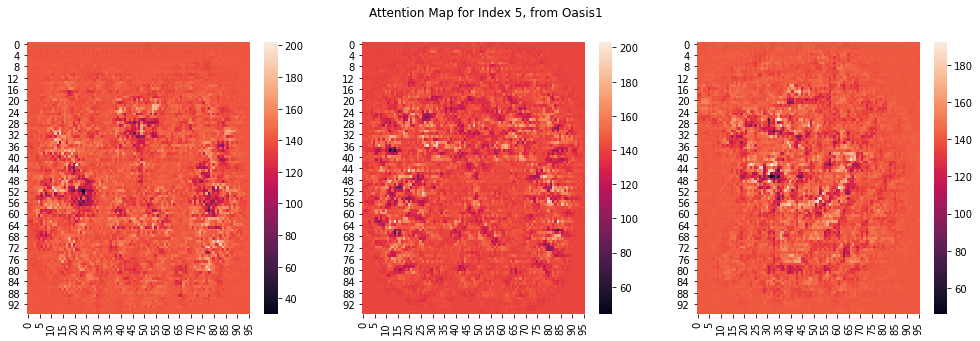

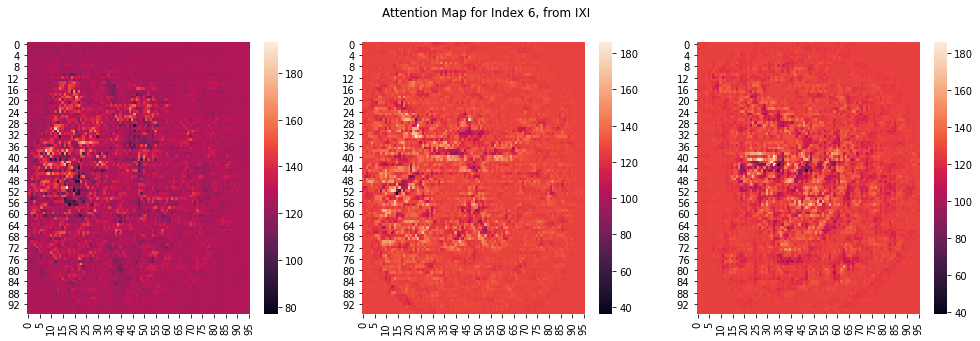

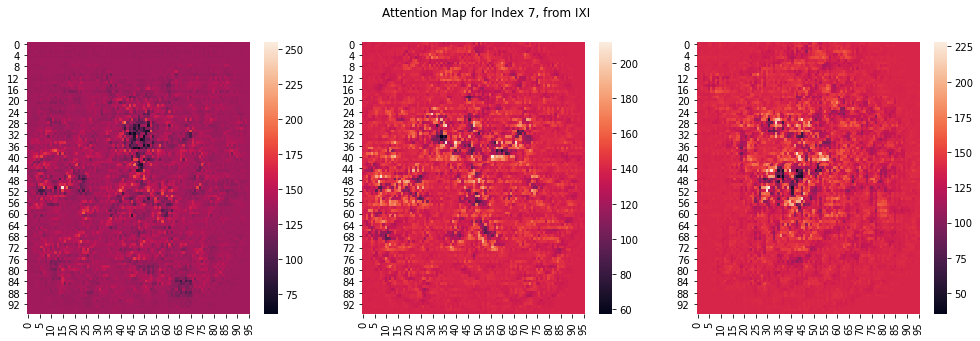

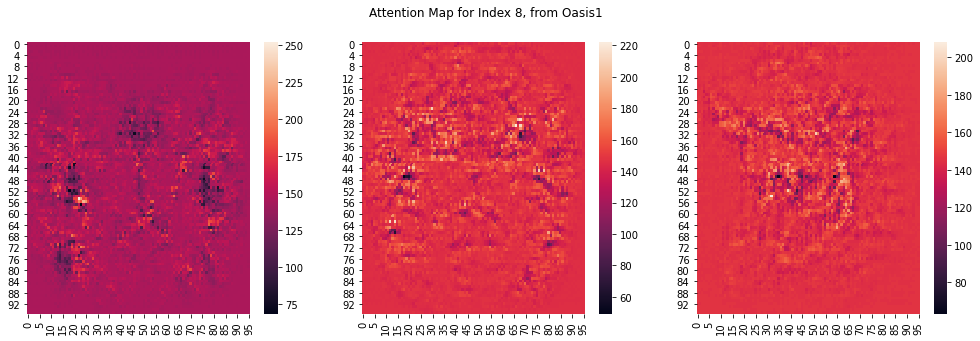

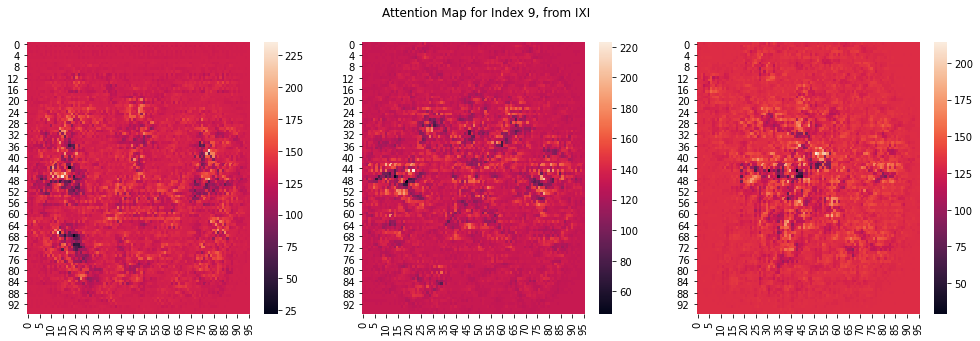

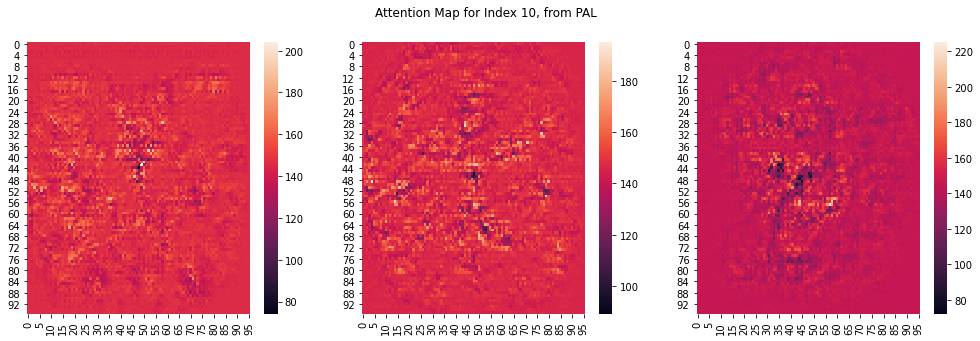

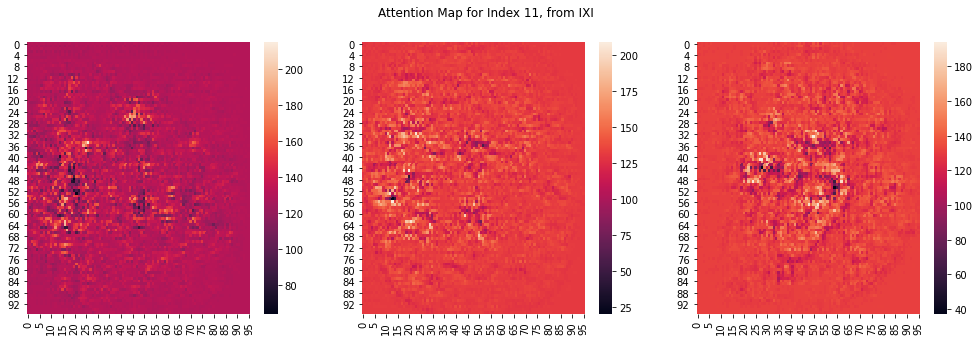

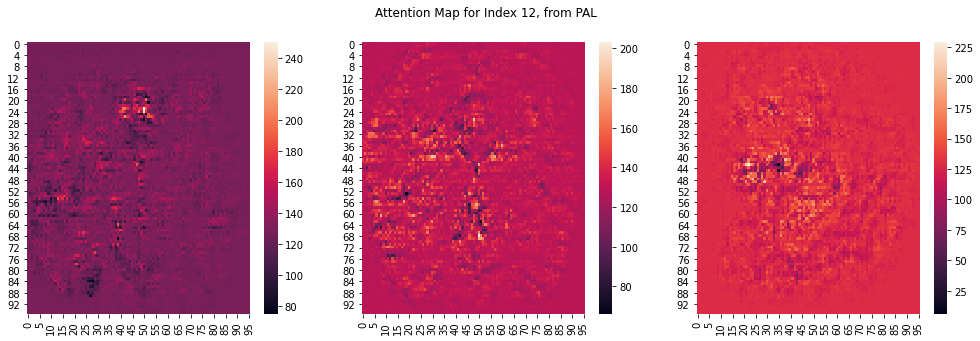

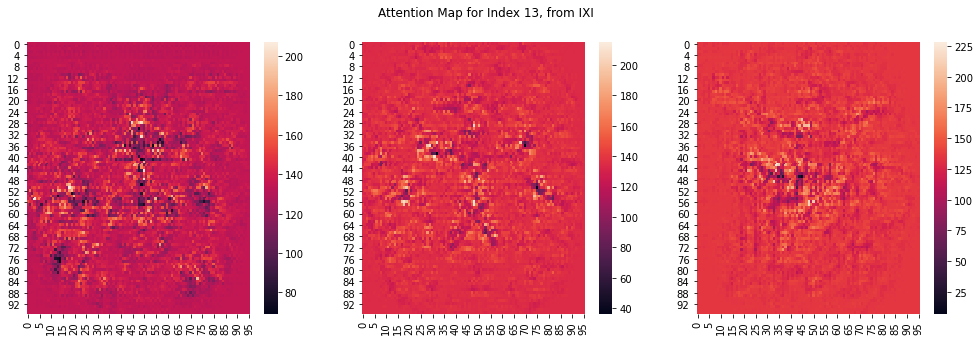

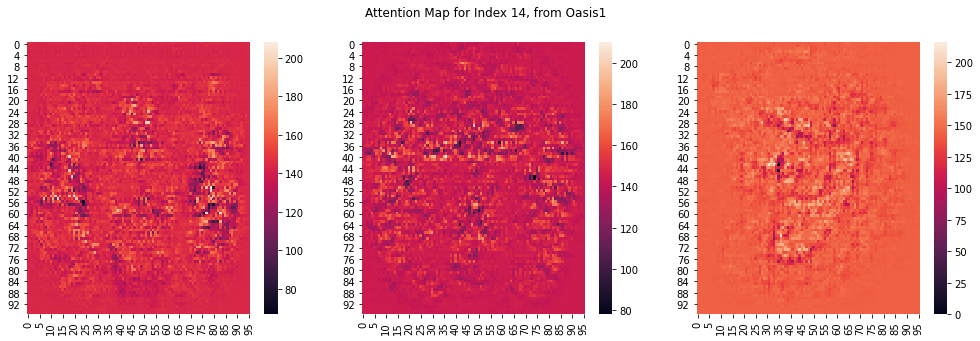

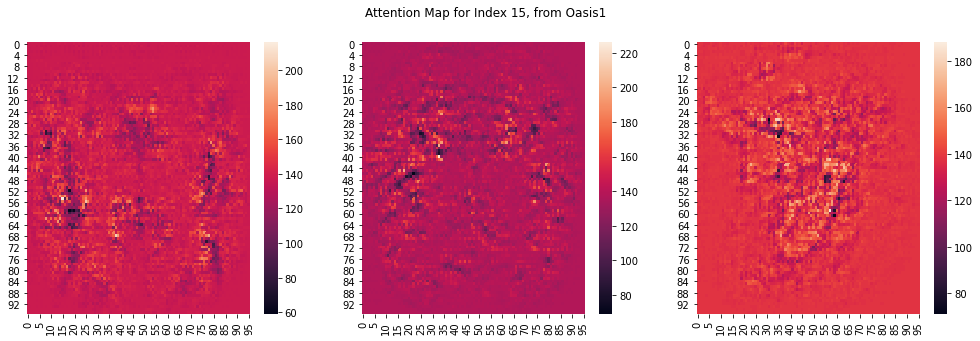

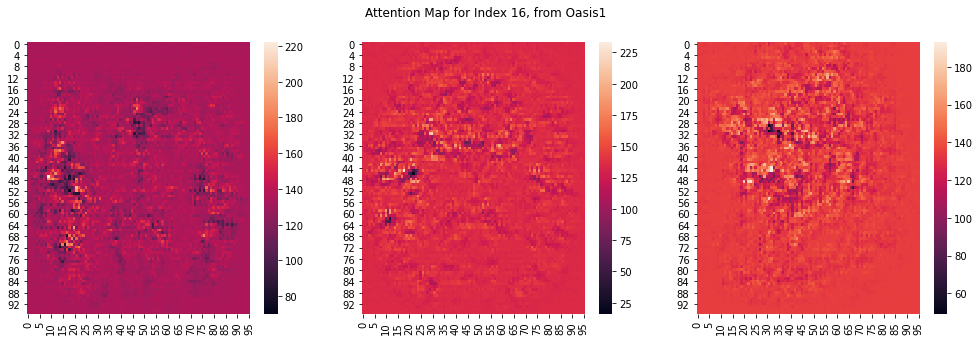

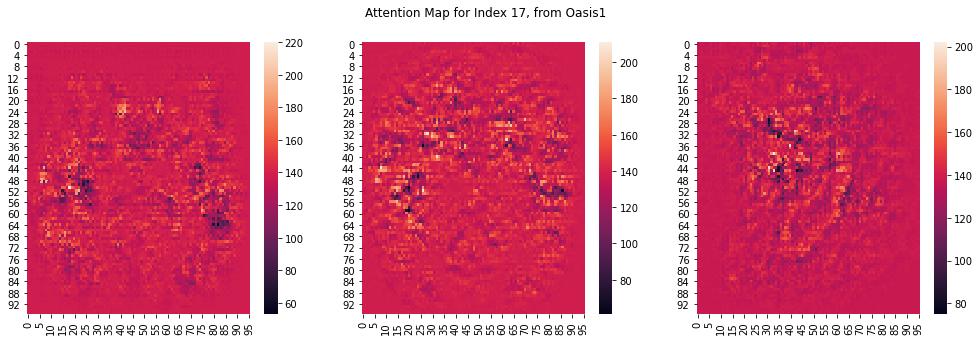

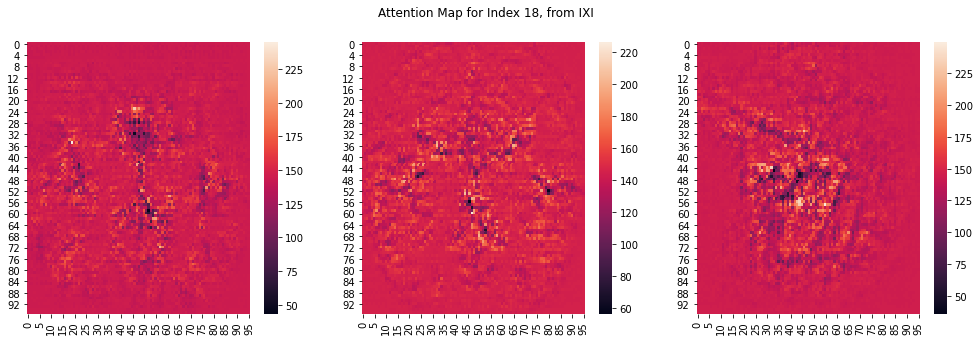

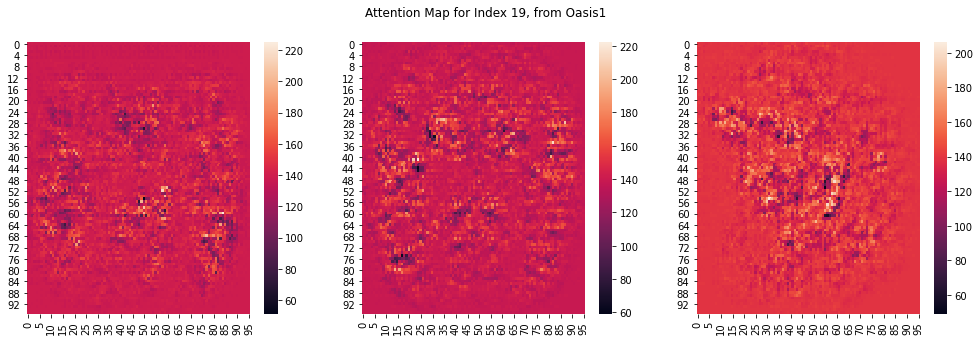

In [67]:
path = glob("./attention_maps/test/conv1-gbp/*.nii.gz")
i = 0
for idx in range(i, i + 20):
    view_heatmap(idx=idx, avg=False, path=path)

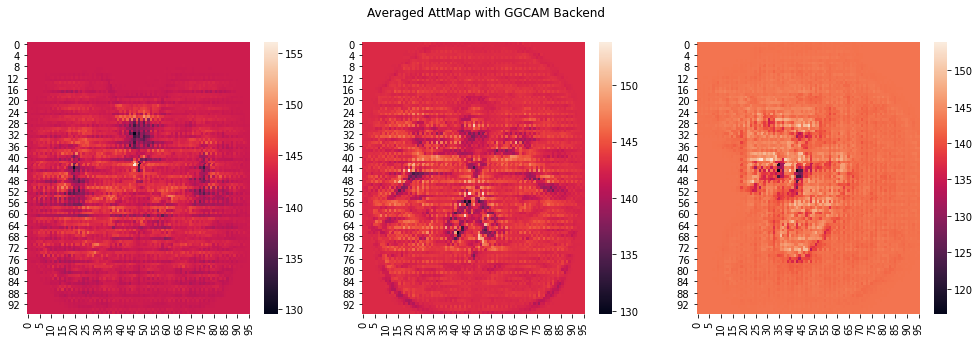

In [72]:
path = glob("./attention_maps/test/conv1-ggcam/*.nii.gz")
view_heatmap(avg=True, path=path, custom_title="Averaged AttMap with GGCAM Backend")

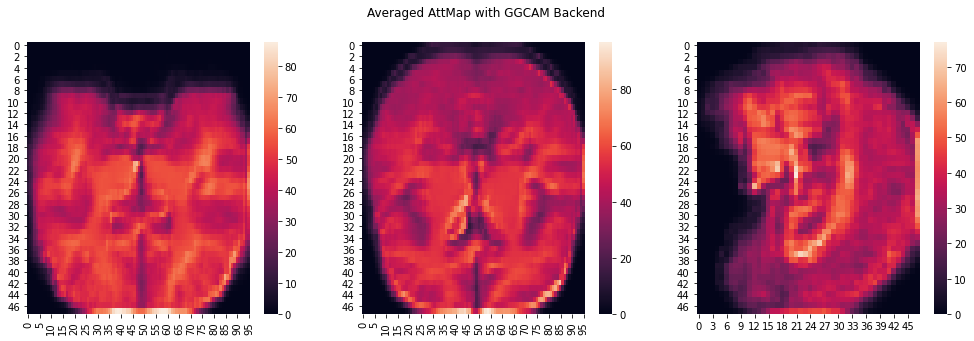

In [73]:
path = glob("./attention_maps/6-073/conv1/*.nii.gz")
view_heatmap(avg=True, path=path, custom_title="Averaged AttMap with GGCAM Backend")

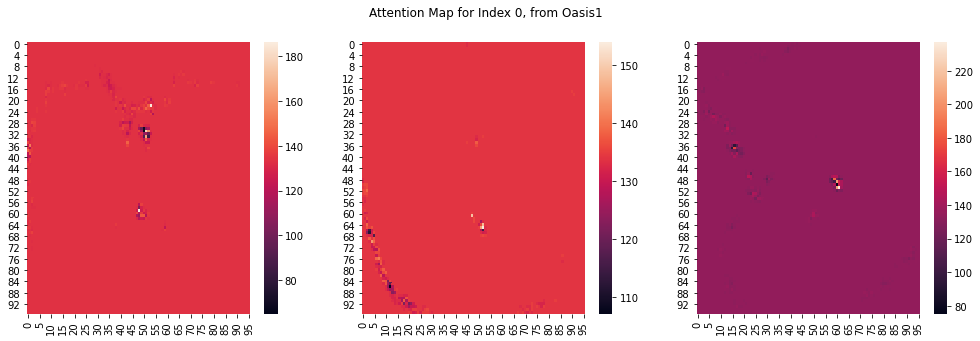

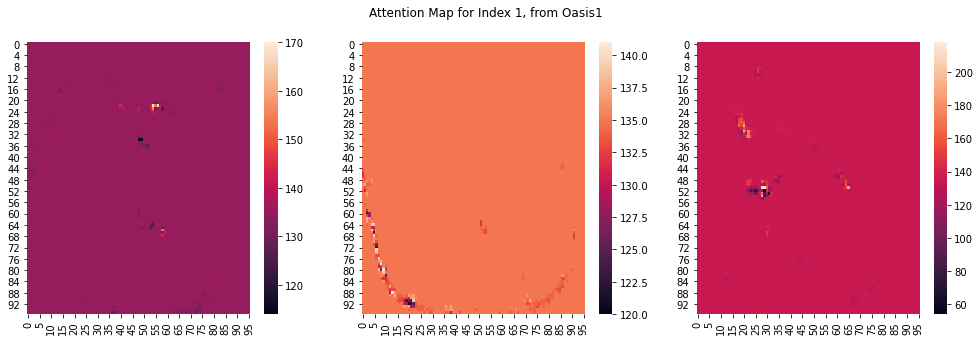

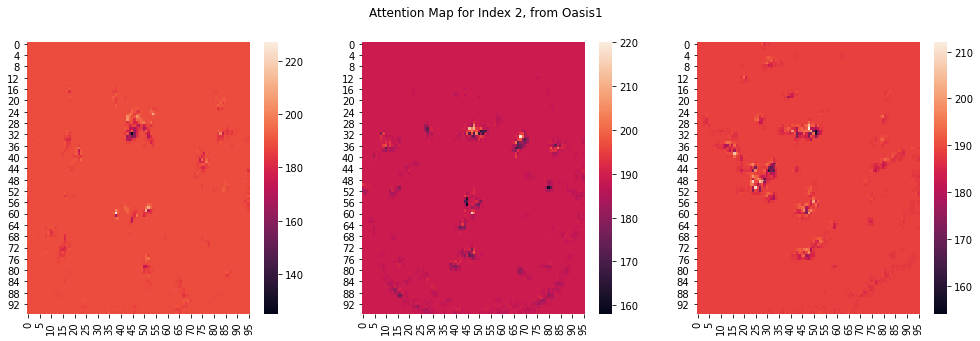

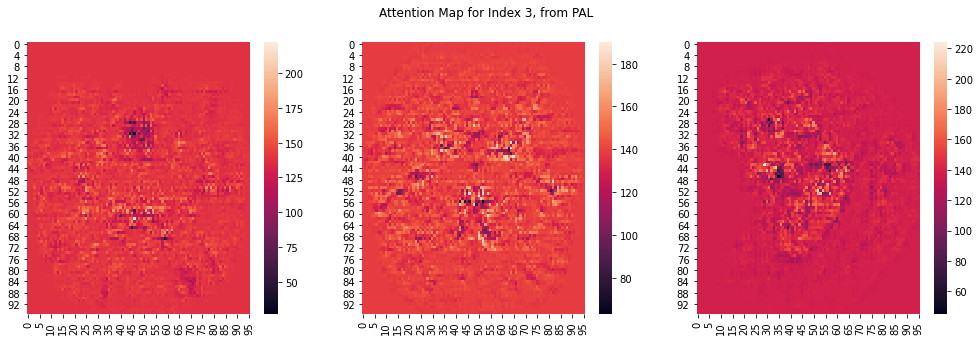

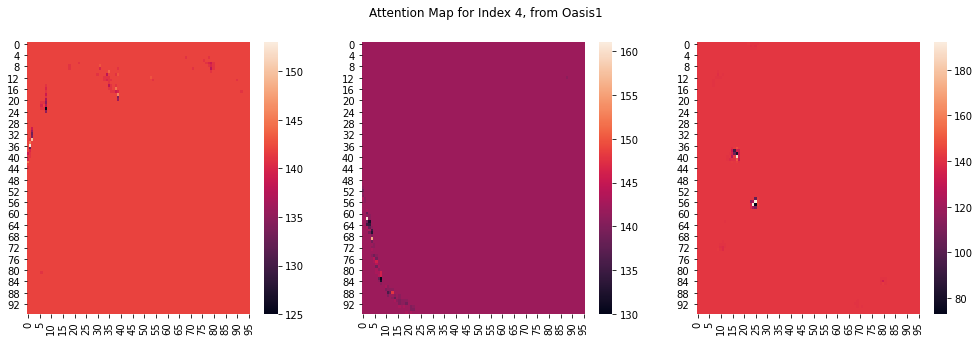

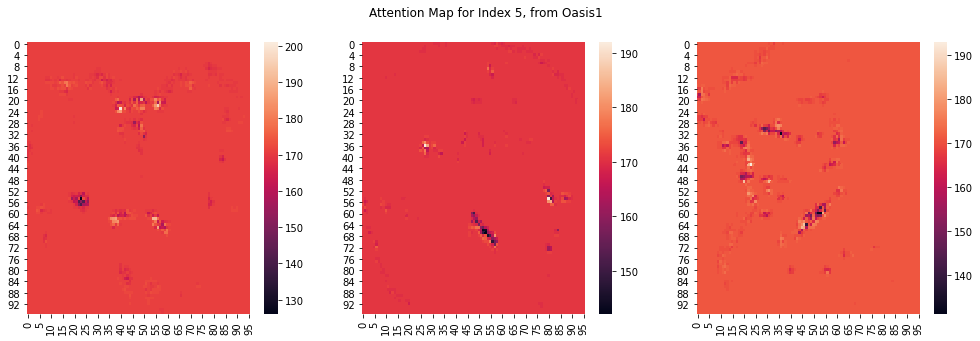

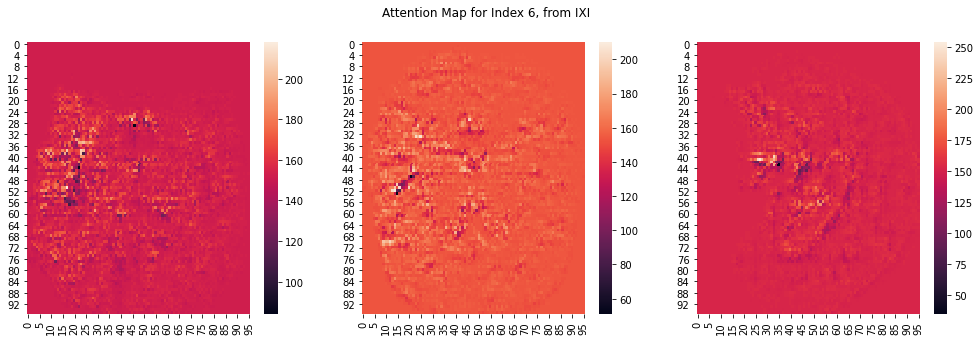

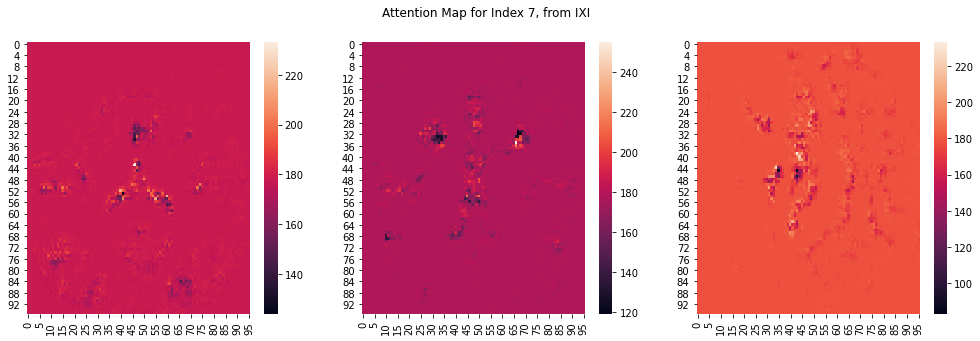

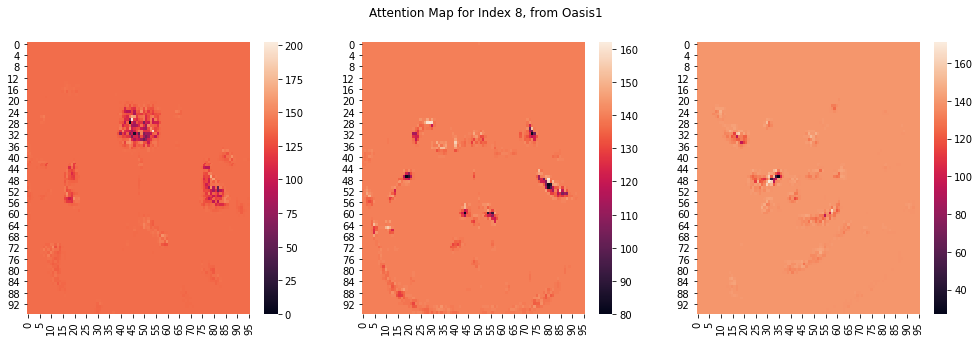

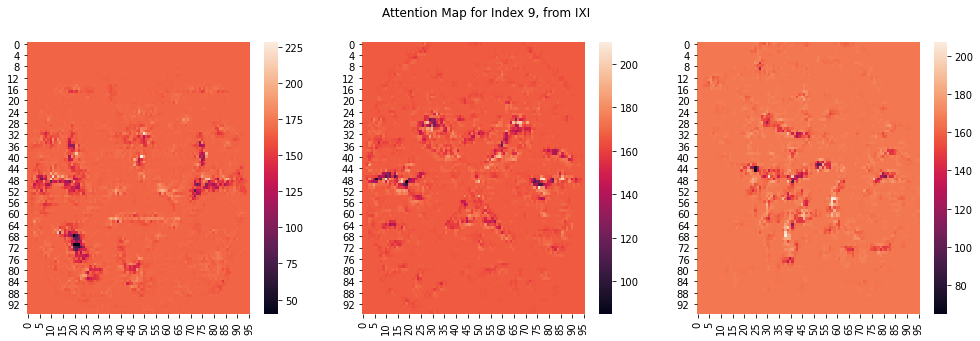

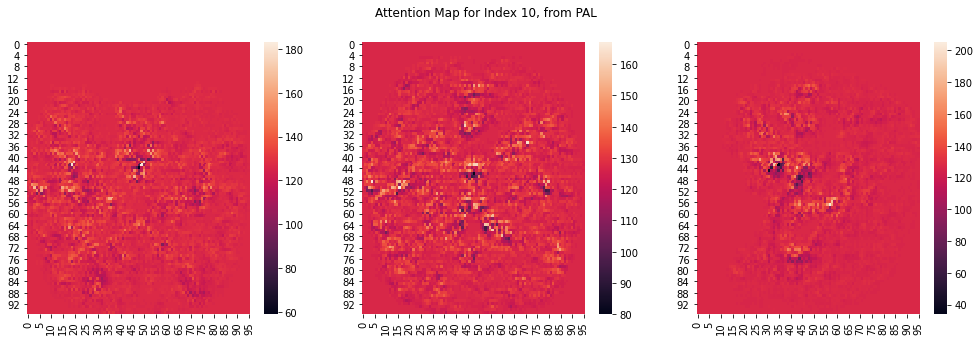

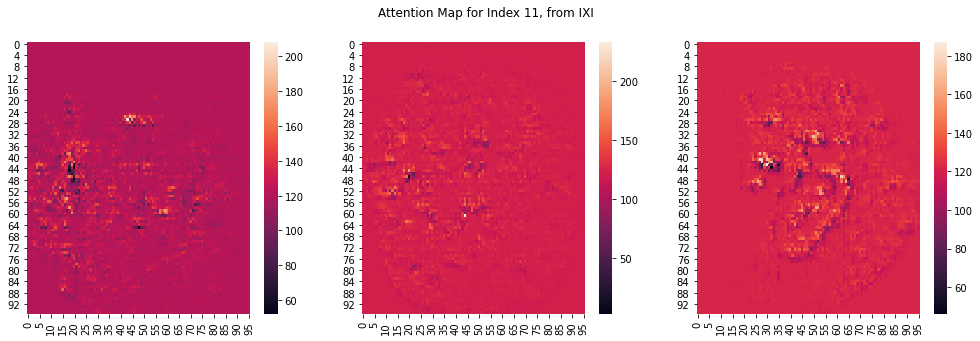

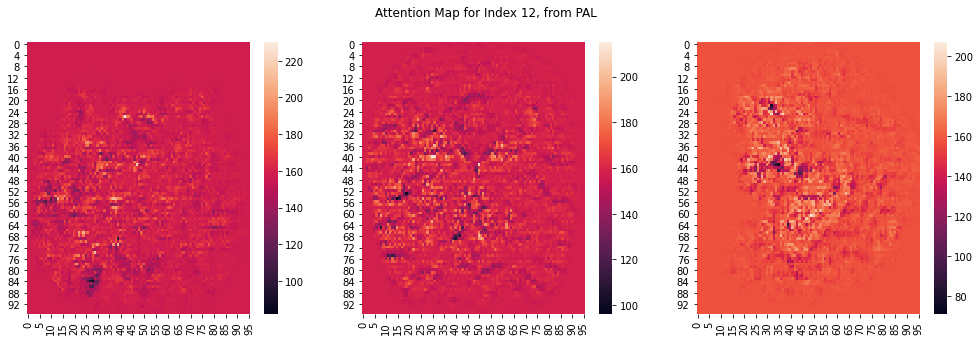

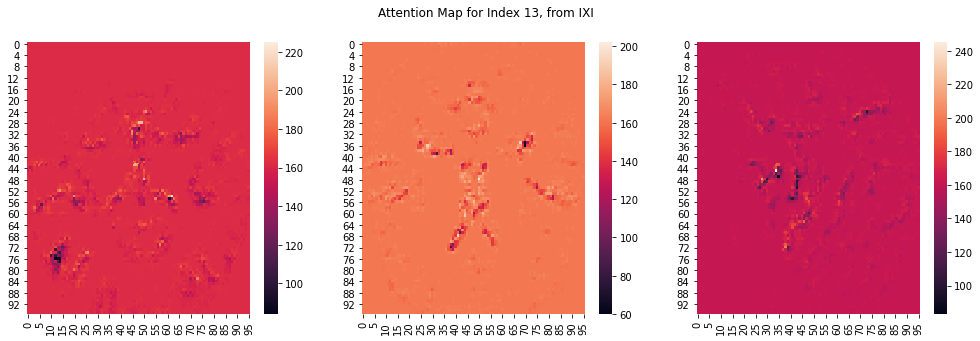

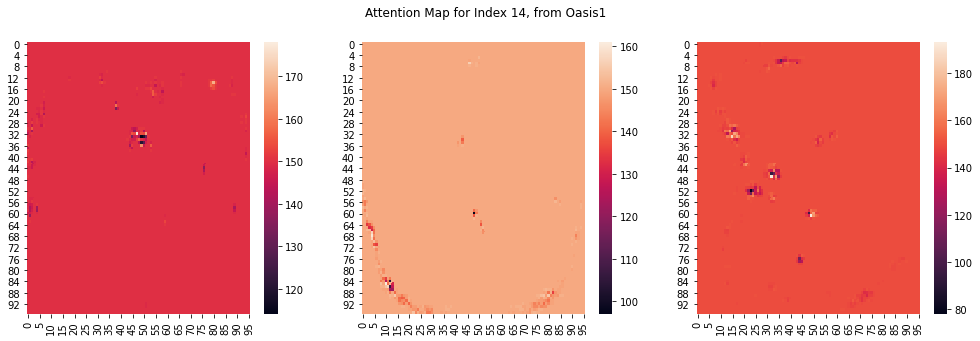

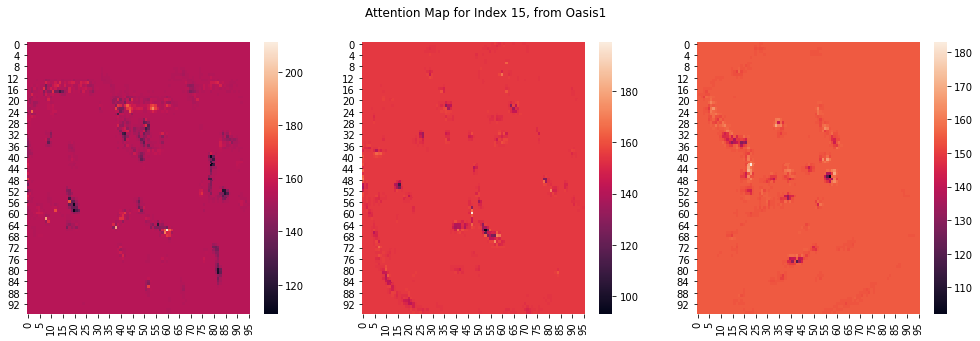

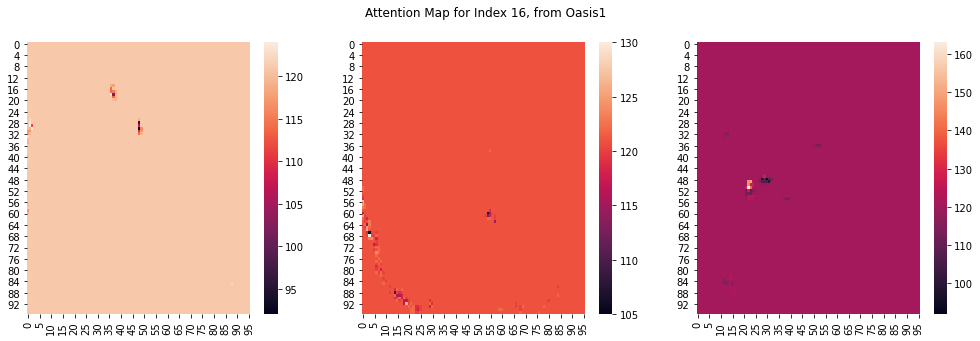

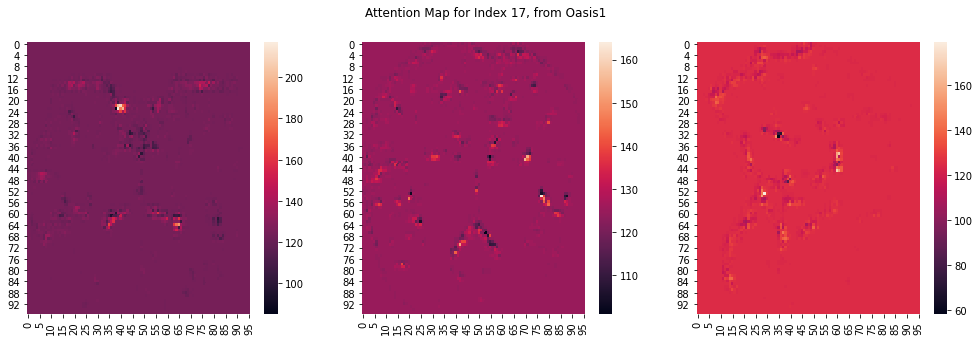

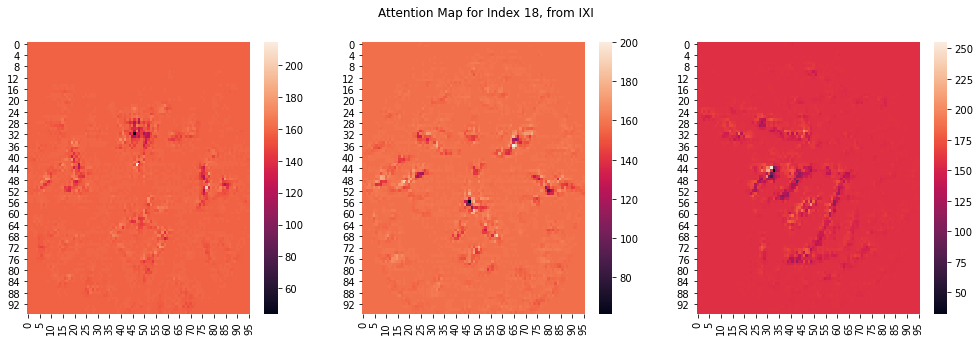

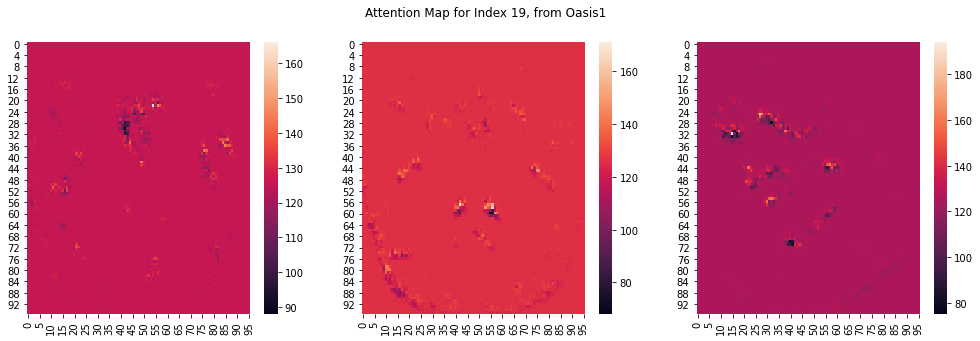

In [63]:
path = glob("./attention_maps/test/conv1-ggcam/*.nii.gz")
i = 0
for idx in range(i, i + 20):
    view_heatmap(idx=idx, avg=False, path=path)

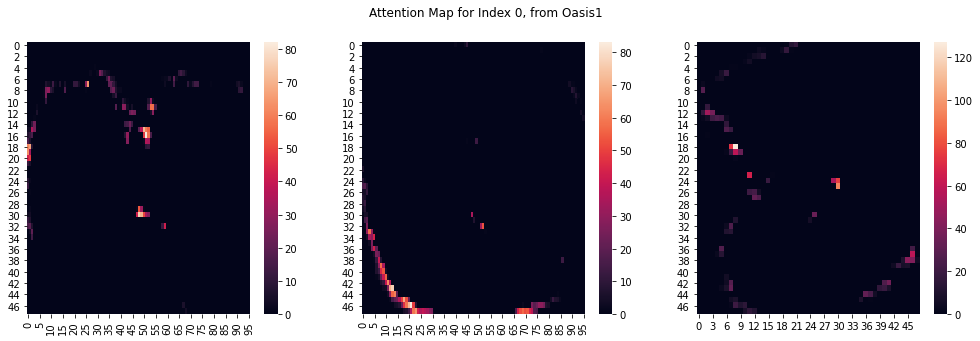

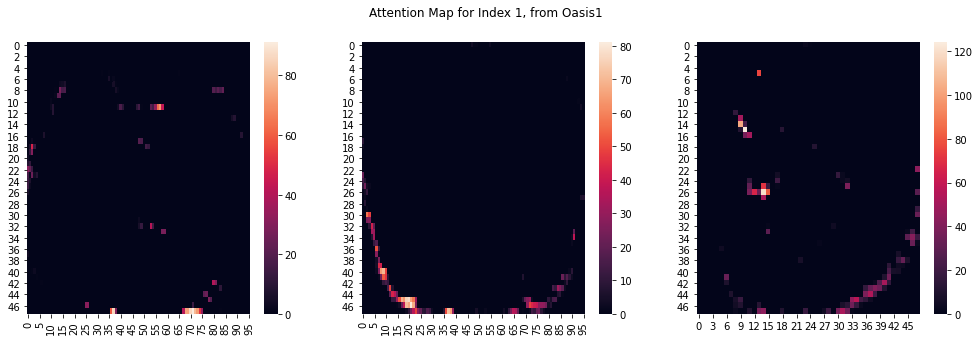

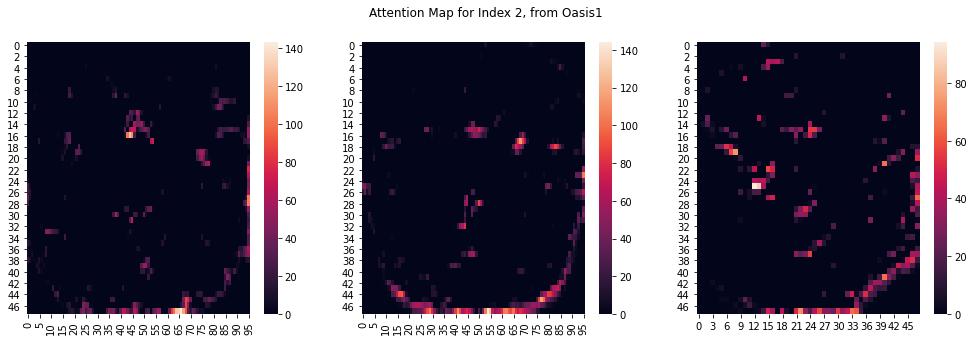

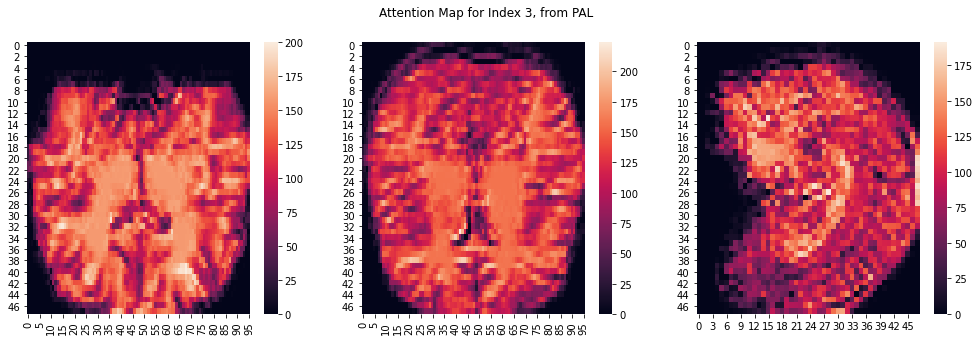

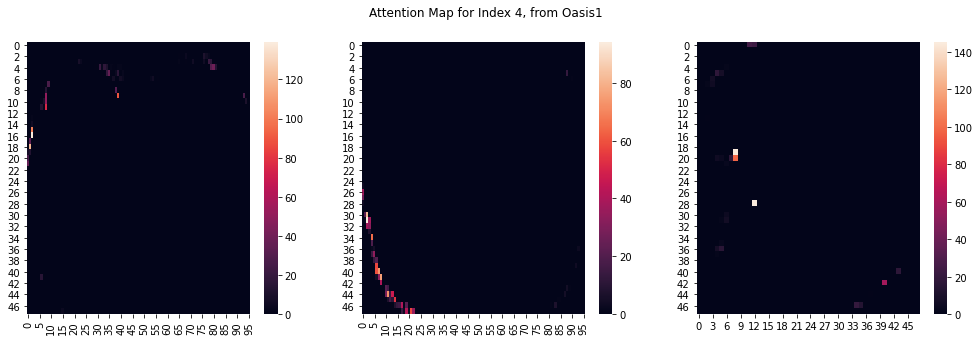

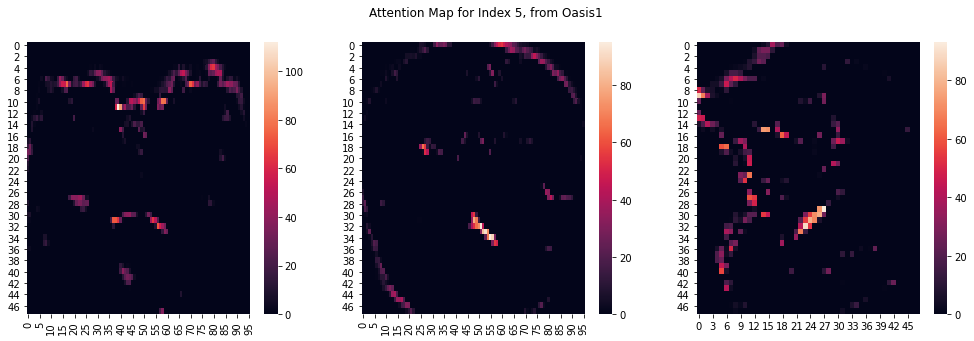

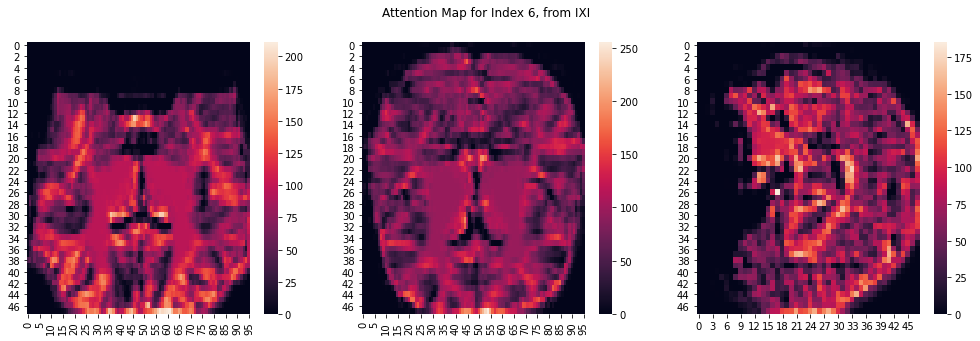

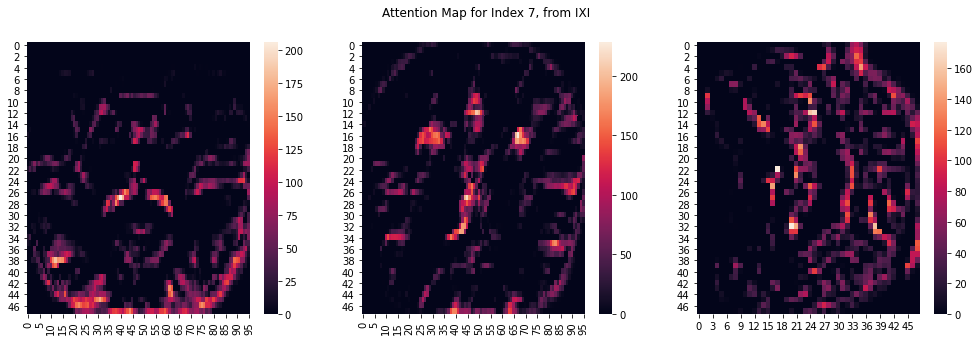

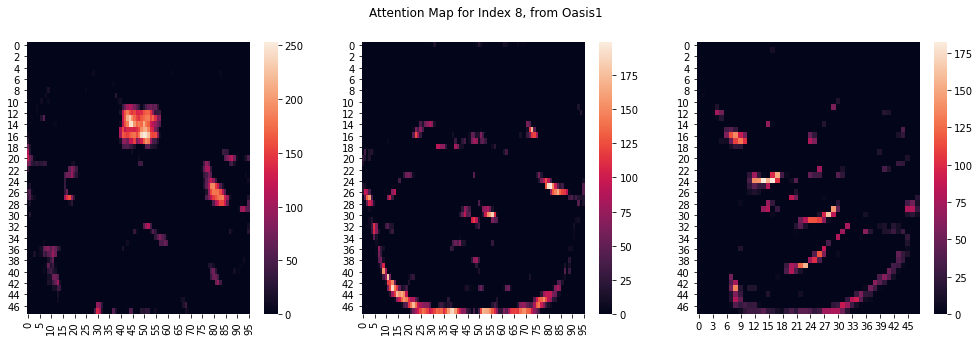

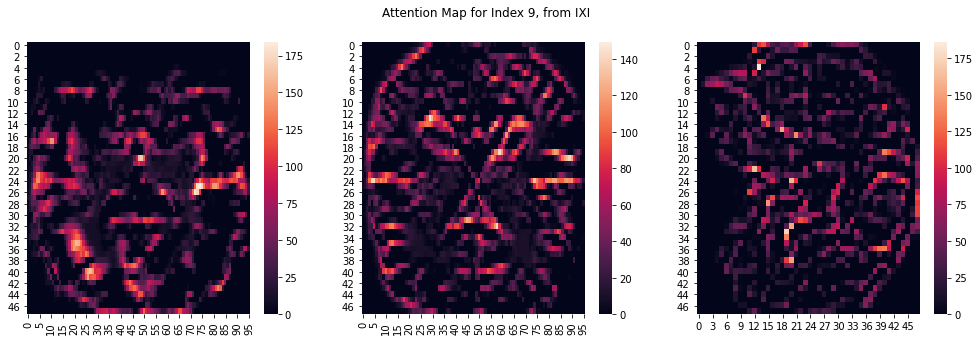

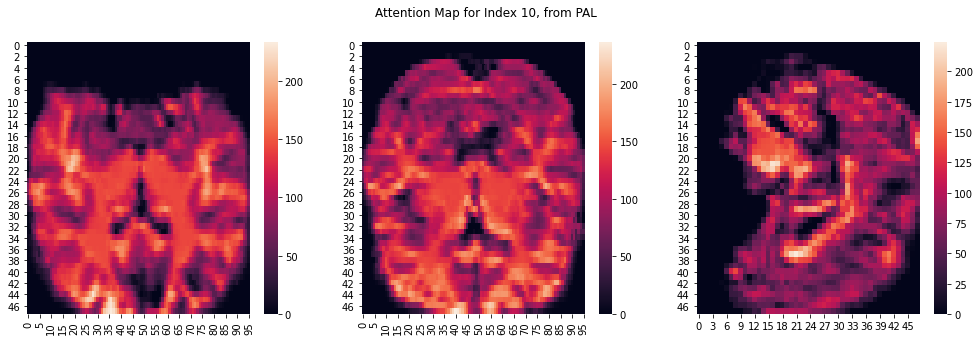

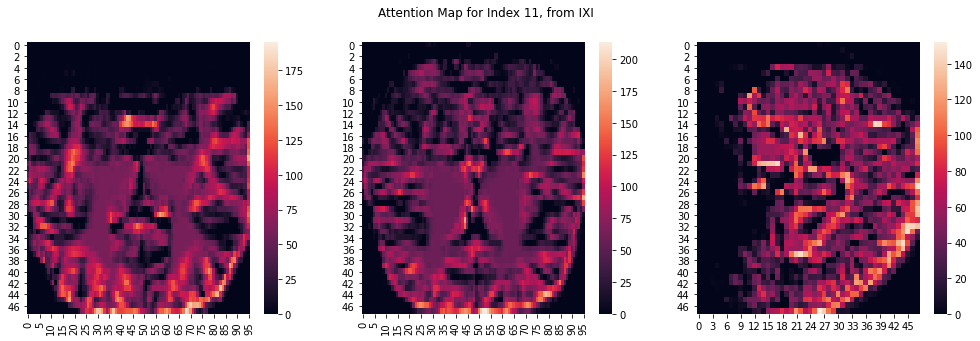

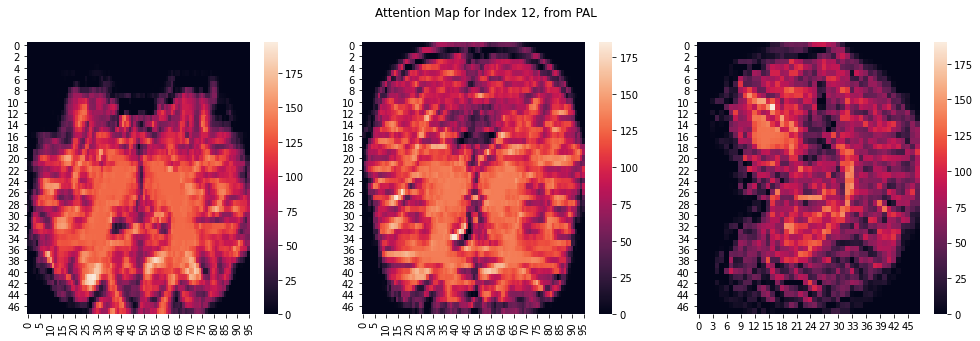

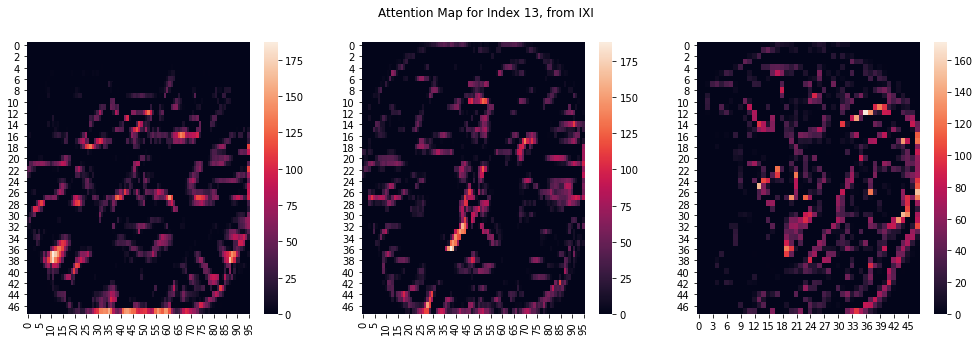

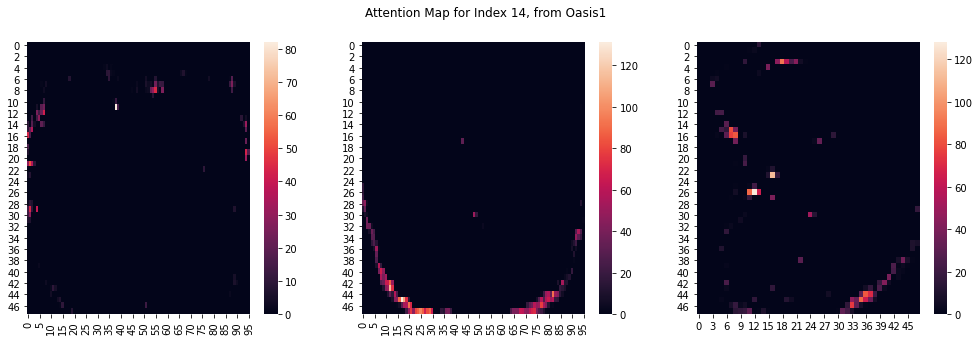

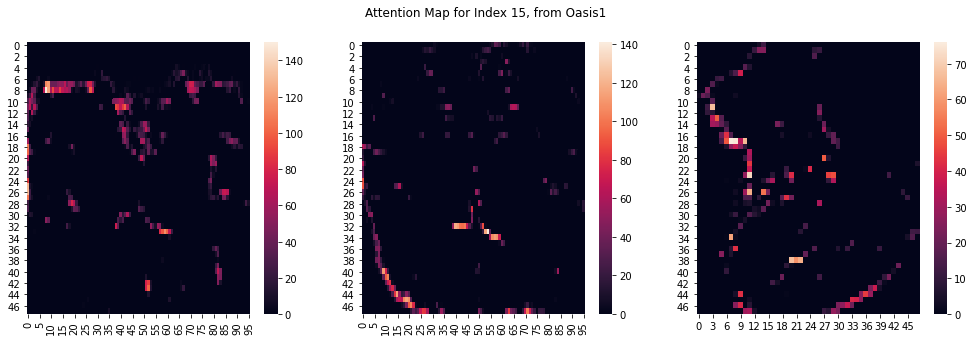

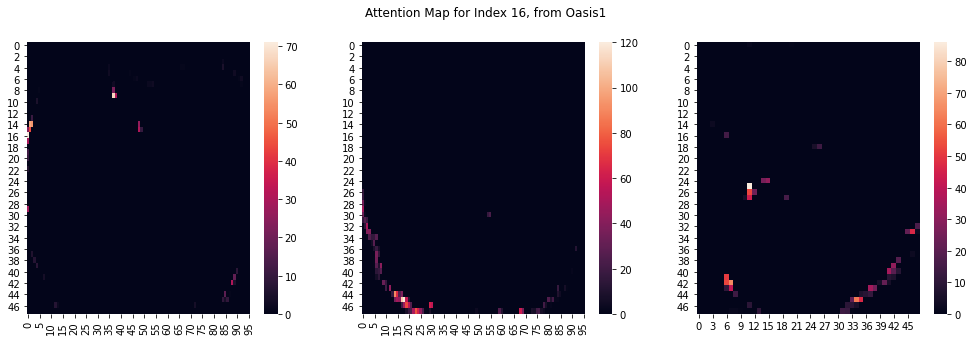

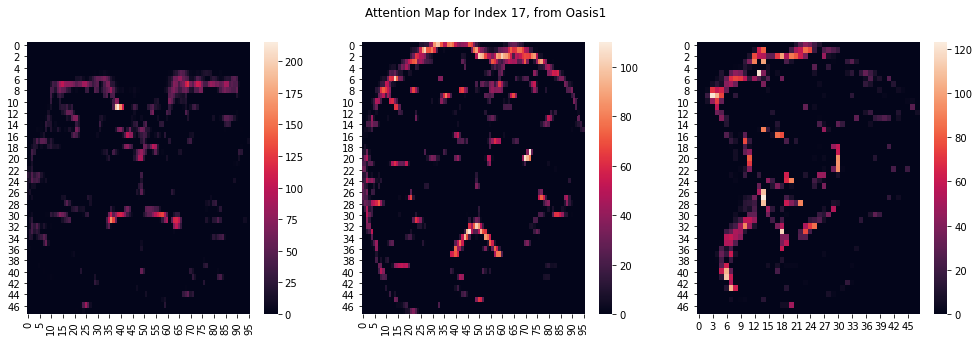

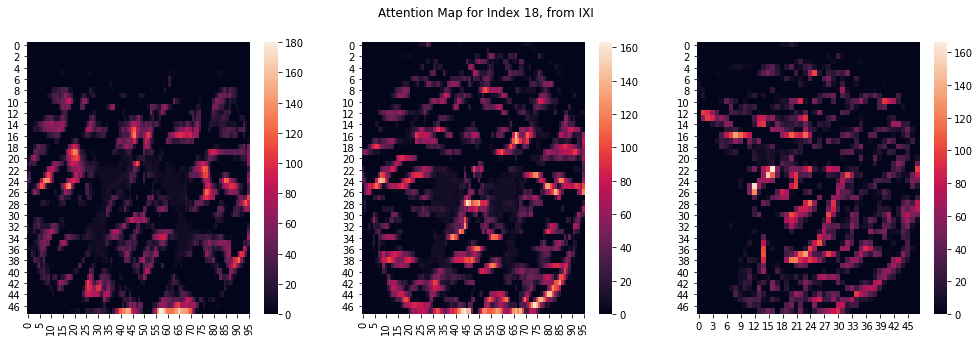

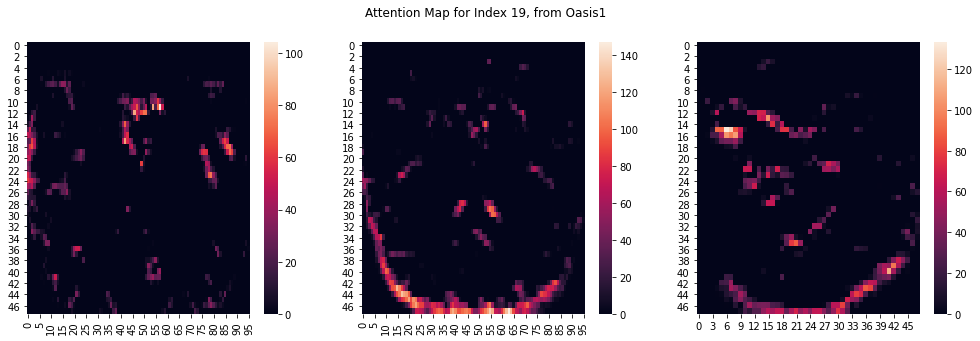

In [47]:
path = glob("./attention_maps/test/conv1/*.nii.gz")

i = 0
for idx in range(i, i + 20):
    view_heatmap(idx=idx, avg=False, path=path)

In [24]:
layers = ["conv1", "layer1", "layer2", "layer3", "layer4"]

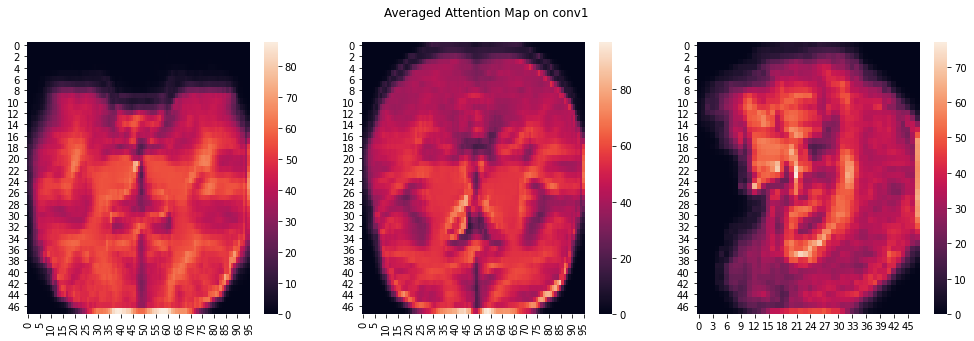

In [32]:
i = 0
path = glob("./attention_maps/6-073/" + layers[i] + "/*.nii.gz")
view_heatmap(avg=True, path=path, layer=layers[i])

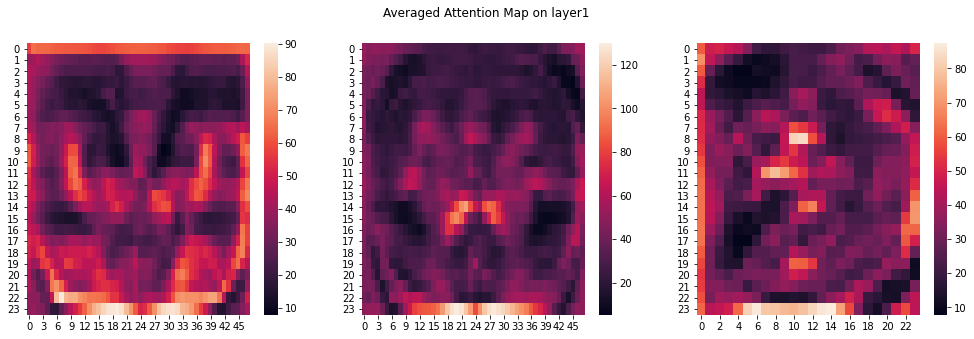

In [28]:
path = glob("./attention_maps/6-073/" + layers[1] + "/*.nii.gz")
view_heatmap(avg=True, path=path, layer=layers[1])

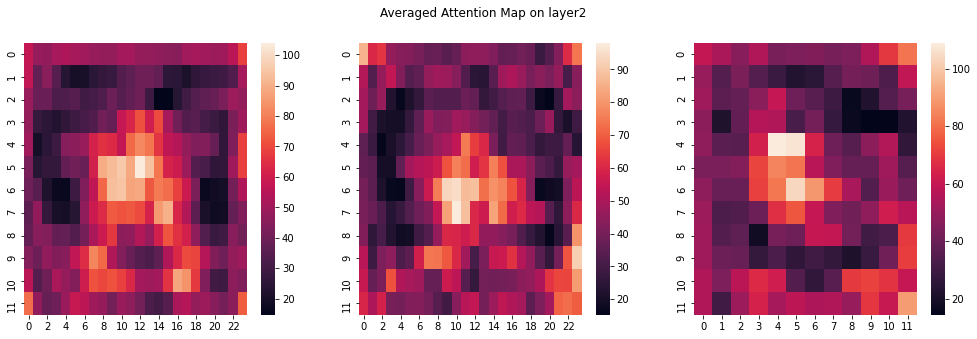

In [29]:
i = 2
path = glob("./attention_maps/6-073/" + layers[i] + "/*.nii.gz")
view_heatmap(avg=True, path=path, layer=layers[i])

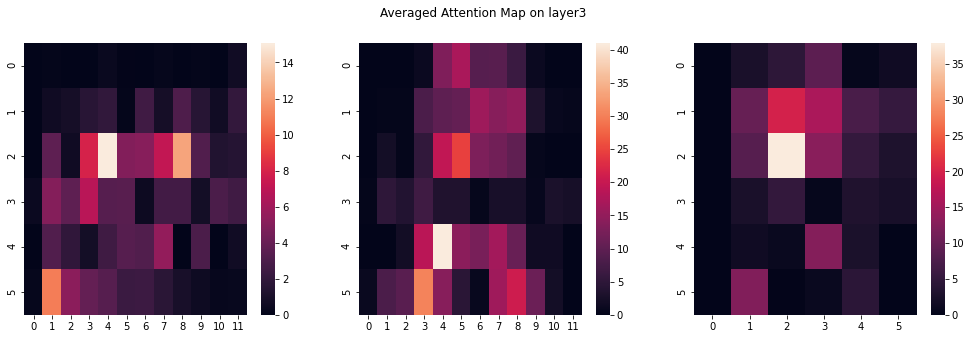

In [30]:
i = 3
path = glob("./attention_maps/6-073/" + layers[i] + "/*.nii.gz")
view_heatmap(avg=True, path=path, layer=layers[i])

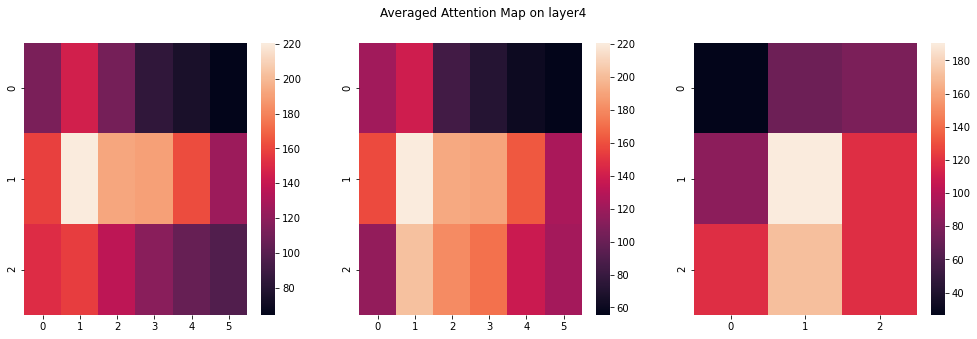

In [31]:
i = 4
path = glob("./attention_maps/6-073/" + layers[i] + "/*.nii.gz")
view_heatmap(avg=True, path=path, layer=layers[i])

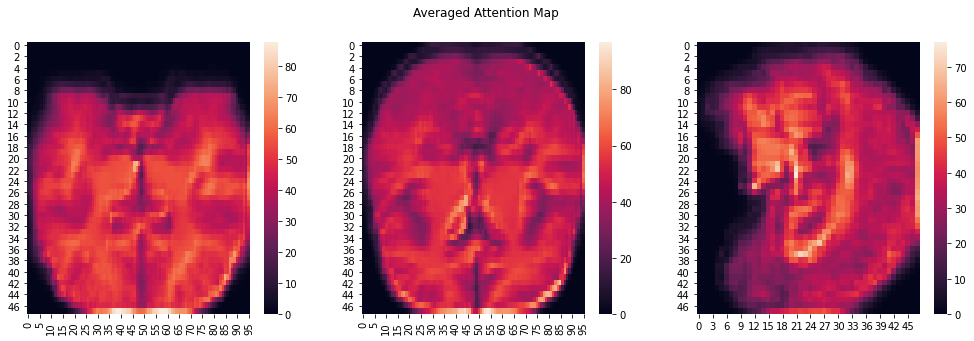

In [16]:
view_heatmap(avg=True, path=path)

In [ ]:
# for idx in np.random.choice(range(len(path)), size=10):
#     view_heatmap(idx)

## Zero-ratios for attention maps

### Calculate Zero-ratios

In [70]:
ratios = []
for idx, file in enumerate(path):

    att = nib.load(file).get_fdata()
    zero = len(att[att == 0]) / (48 * 48 * 96) * 100
    data = dset.data_files[idx].split("\\")[-1]
    ratios.append((data, zero))

### and their Histograms from different source

In [72]:
ratios_sorted = sorted(ratios, key=(lambda x: x[0]))

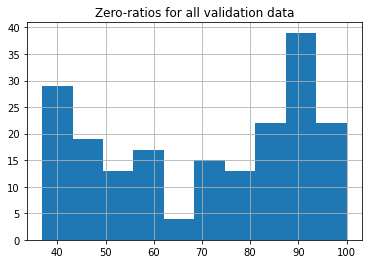

In [90]:
plt.title("Zero-ratios for all validation data")
plt.hist([_[1] for _ in ratios_sorted])
plt.grid()

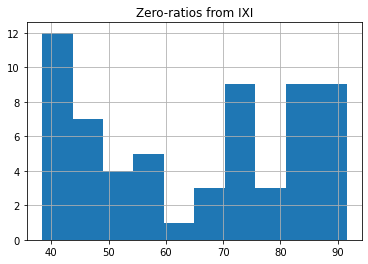

In [91]:
ratios_ixi = list(filter(lambda x: x[0][:3] == "IXI", ratios_sorted))
plt.title("Zero-ratios from IXI")
plt.hist([_[1] for _ in ratios_ixi])
plt.grid()

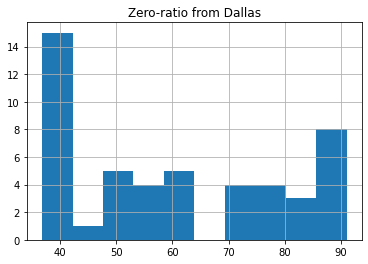

In [92]:
ratios_pal = list(filter(lambda x: x[0][:3] == "PAL", ratios_sorted))
plt.title("Zero-ratio from Dallas")
plt.hist([_[1] for _ in ratios_pal])
plt.grid()

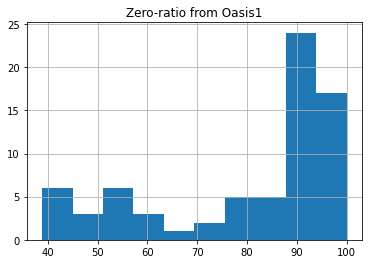

In [93]:
ratios_recon = list(filter(lambda x: x[0][:5] == "recon", ratios_sorted))
plt.title("Zero-ratio from Oasis1")
plt.hist([_[1] for _ in ratios_recon])
plt.grid()

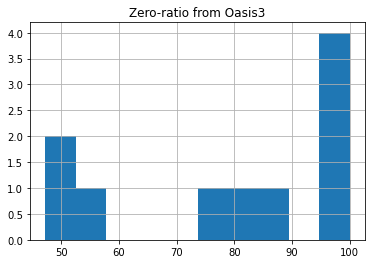

In [94]:
ratios_sub = list(filter(lambda x: x[0][:3] == "sub", ratios_sorted))
plt.title("Zero-ratio from Oasis3")
plt.hist([_[1] for _ in ratios_sub])
plt.grid()

## Original Source Quality Checking

In [31]:
from src.slice_viewer import *
from scipy.ndimage import zoom
import seaborn as sns

In [16]:
path = glob("./attention_maps/conv1/*.nii.gz")

In [17]:
def attmap_resize(att_map, rollback_sz=(141, 172, 110)):

    if isinstance(att_map, str):

        if att_map[-3:] == ".gz" or att_map[-3:] == "nii":
            att_map = nib.load(att_map).get_fdata()

        elif att_map[-3:] == "npy":
            att_map = np.load(att_map)

        else:
            print("What is this?")
            return

    elif isinstance(att_map, np.ndarray):
        pass

    else:
        pass

    att_map_sz = att_map.shape
    zoom_ratio = tuple(r / o for r, o in zip(rollback_sz, att_map_sz))

    return zoom(att_map, zoom_ratio)


def to_Nifti1Image(att_map, affine_mat=np.eye(4), fname=None):

    att_map = nib.Nifti1Image(att_map, affine_mat)
    if fname is None:
        fname = "resized_attmap/untitled.nii.gz"
    nib.save(att_map, fname)

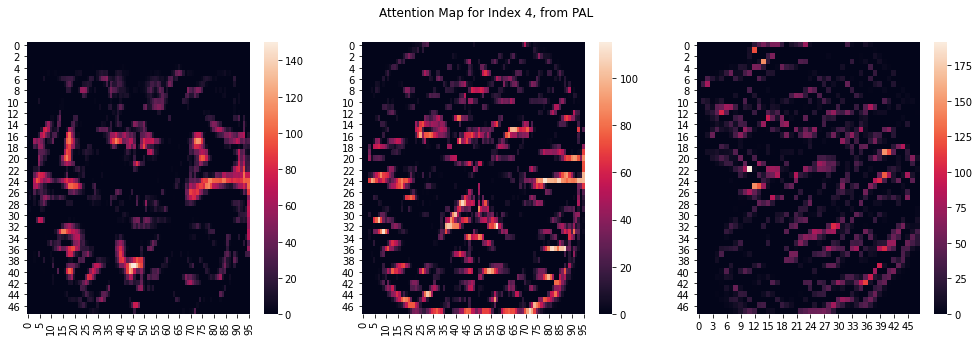

In [51]:
idx = 4
view_heatmap(idx=idx, path=path)

In [54]:
resized_attmap = attmap_resize(path[idx])
dset.data_files[idx]

'../../brainmask_tlrc\\PAL1784_mpr_wave1_orig-brainmask_tlrc.npy'

<AxesSubplot:>

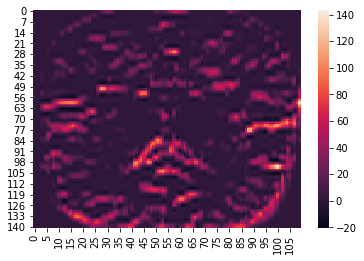

In [46]:
sns.heatmap(resized_attmap[:, 80, :])

In [56]:
attmap_fname = dset.data_files[idx].split("\\")[-1][:-4] + "heatmap.nii.gz"
to_Nifti1Image(resized_attmap, fname=attmap_fname)

original_fname = dset.data_files[idx].split("\\")[-1][:-4]
to_Nifti1Image(np.load(dset.data_files[idx]), fname=original_fname)

../../brainmask_tlrc\sub-OAS30852_ses-d2307_run-04_T1w_tlrc.npy


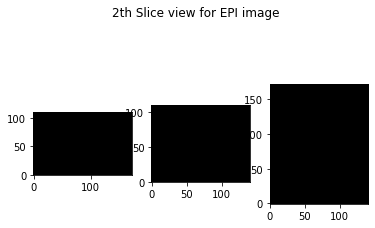

../../brainmask_tlrc\sub-OAS30960_ses-d0061_run-04_T1w_tlrc.npy


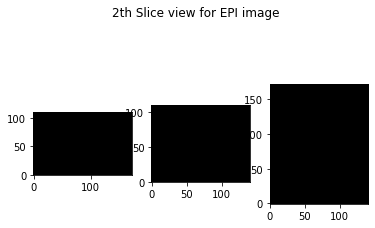

../../brainmask_tlrc\reconV6_OAS1_0002_MR1-brainmask_tlrc.npy


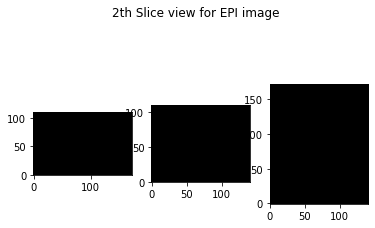

../../brainmask_tlrc\sub-OAS30249_ses-d0091_run-03_T1w_tlrc.npy


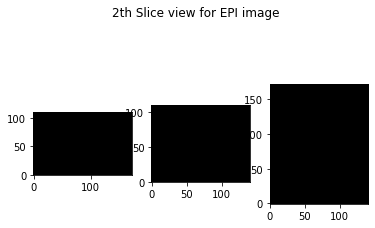

../../brainmask_tlrc\sub-OAS30936_ses-d5756_run-03_T1w_tlrc.npy


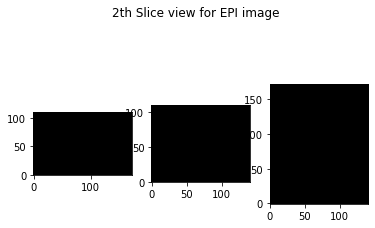

In [22]:
for idx in [68, 111, 112, 123, 139]:

    print(dset.data_files[idx])
    viewer = SliceViewer(dset.data_files[idx])
    viewer.triple_view()

In [77]:
original_path = glob("../../brainmask_tlrc/*.npy")
original_path.sort()

elastic_deform = tio.RandomElasticDeformation()
for file in tqdm(original_path):

    brain = np.load(file)
    fname = file.split("\\")[1][:-4]
    np.save(
        f"../../brainmask_elasticdeform/{fname}.npy", elastic_deform(brain[None, ...])
    )

100%|██████████████████████████████████████████████████████████████████████████████| 1427/1427 [37:59<00:00,  1.60s/it]


In [83]:
dset.data_files[0]

'../../brainmask_tlrc\\reconV6_OAS1_0345_MR1-brainmask_tlrc.npy'

In [84]:
np.load(dset.data_files[0].replace("/brainmask_tlrc", "/brainmask_elasticdeform")).shape

(1, 141, 172, 110)

In [87]:
import numpy as np
import torchio as tio

transform = {
    "affine": tio.RandomAffine(),
    "flip": tio.RandomFlip(axes=["left-right"]),
    "elastic_deform": tio.RandomElasticDeformation(),
}
np.random.choice(transform.keys())

ValueError: a must be 1-dimensional or an integer

In [89]:
transform.keys()

dict_keys(['affine', 'flip', 'elastic_deform'])

In [90]:
np.random.choice(list(transform.keys()))

'elastic_deform'

../../brainmask_tlrc\sub-OAS30444_ses-d0001_run-04_T1w_tlrc.npy


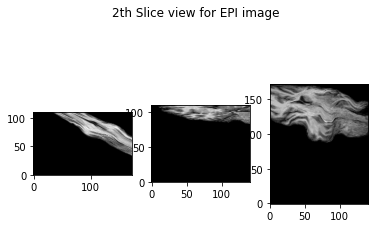

In [23]:
for idx in [13]:

    print(dset.data_files[idx])
    viewer = SliceViewer(dset.data_files[idx])
    viewer.triple_view()

../../brainmask_tlrc\PAL221_mpr_wave1_orig-brainmask_tlrc.npy


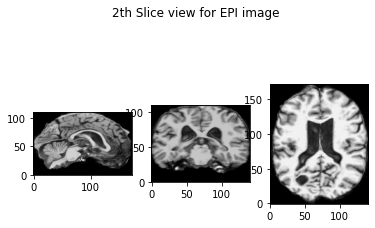

../../brainmask_tlrc\IXI415-Guys-0942-T1-brainmask_tlrc.npy


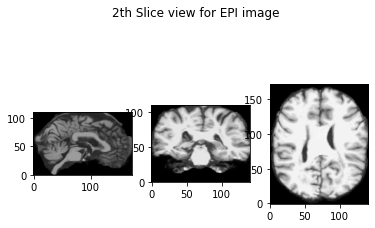

In [25]:
for idx in [168, 181]:

    print(dset.data_files[idx])
    viewer = SliceViewer(dset.data_files[idx])
    viewer.triple_view()

## Attention maps from Layer 4

./attention_maps/tmp/layer4/

In [9]:
path = glob("./attention_maps/tmp/layer1/*.nii.gz")

In [100]:
avg_map = nib.load(path[0]).get_fdata()
for att in path[1:]:

    avg_map += nib.load(att).get_fdata()

avg_map /= len(path)

In [101]:
avg_map.shape

(3, 3, 6)

<AxesSubplot:>

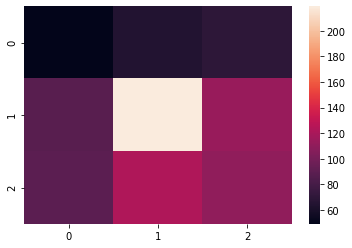

In [102]:
sns.heatmap(avg_map[:, :, 3])

# Handmade Visualizations

### Setup

In [3]:
from src.visualization.cams import CAM
from src.data.data_util import DatasetPlus
from src.config import *

cfg = load_config()

train_dataset = DatasetPlus(cfg, augment=False)
sample_dl = DataLoader(train_dataset, batch_size=1)
iterator = iter(sample_dl)

model = "resnet"
model, device = load_model(model, verbose=False)
# model.load_state_dict(torch.load('./result/models/2021_03_02_1509/best_resnet_ep31-100_sd42_mae6.811.pth'))
model.load_state_dict(
    torch.load("./result/models/2021_03_04_2101/best_resnet_ep93-100_sd42_mae6.573.pth")
)

Model Resnet is selected.


<All keys matched successfully>

### Funcs

In [38]:
def plot_vismap(brain, vismap, masked=True, threshold=2, slc=48, alpha=0.6, view=0):

    if masked:
        vismap = np.ma.masked_where(vismap < 2, vismap)

    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

    axes[0].set_title("Saggital")
    axes[0].imshow(np.rot90(brain[slc, :, :]), cmap="gray", interpolation="none")
    axes[0].imshow(
        np.rot90(vismap[slc, :, :]), cmap="jet", interpolation="none", alpha=alpha
    )

    axes[1].set_title("Coronal")
    axes[1].imshow(np.rot90(brain[:, slc, :]), cmap="gray", interpolation="none")
    axes[1].imshow(
        np.rot90(vismap[:, slc, :]), cmap="jet", interpolation="none", alpha=alpha
    )

    axes[2].set_title("Horizontal")
    axes[2].imshow(np.rot90(brain[:, :, slc]), cmap="gray", interpolation="none")
    axes[2].imshow(
        np.rot90(vismap[:, :, slc]), cmap="jet", interpolation="none", alpha=alpha
    )

## Averaged Brain

In [175]:
template = torch.zeros_like(next(iter(iterator))[0])
for brain, age in tqdm(iterator):
    template += brain

## Grad-CAM

In [5]:
model.eval()

cam = CAM(cfg, model)
cam.register_hooks("resnet")
device = "cuda:0"

x, y = next(iterator)
x, y = x.to(device), y.to(device)

output = model.forward(x)
print(output, y)

output.backward()

cams = cam.cam_over_layers()
cam.resizing()

tensor([[82.9763]], device='cuda:0', grad_fn=<AddmmBackward>) tensor([83.], device='cuda:0')


In [6]:
def run_cam(model, data, cfg):

    model.eval()
    cam = CAM(cfg, model)
    cam.register_hooks()

    x, y = data
    device = next(model.parameters()).device
    output = model.forward(x.to(device))
    output.backward()

    cam.cam_over_layers()
    cam.remove_hook()
    return cam.resizing()[-1]

In [7]:
model = "resnet"
model, device = load_model(model, verbose=False)
model.load_state_dict(
    torch.load("./result/models/2021_03_02_1509/best_resnet_ep31-100_sd42_mae6.811.pth")
)

sample = run_cam(model, next(iterator), cfg)

Model Resnet is selected.


In [8]:
from tqdm import tqdm

avg = np.zeros_like(sample)
for data in tqdm(sample_dl):
    avg += run_cam(model, data, cfg)

avg /= 1400

  0%|▎                                                                                 | 3/700 [00:03<13:24,  1.15s/it]


KeyboardInterrupt: 

In [40]:
original = x[0][0].cpu().numpy()
resized_cam = cam.resized_cams[4]

pointwised = original * resized_cam

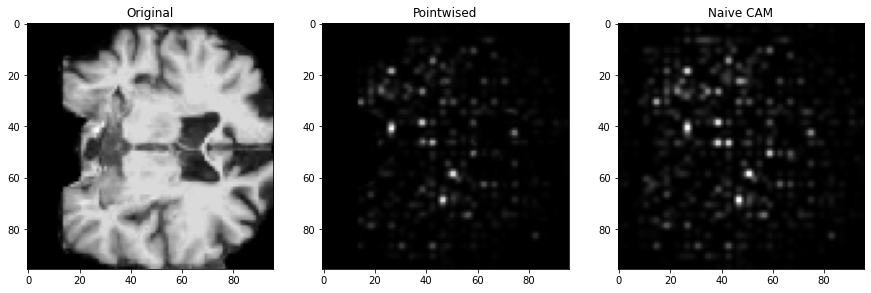

In [39]:
slc = 48
fig, ax = plt.subplots(ncols=3, figsize=(15, 10))

ax[0].set_title("Original")
ax[0].imshow(original[:, slc, :], cmap="gray")

ax[1].set_title("Pointwised")
ax[1].imshow(pointwised[:, slc, :], cmap="gray")

ax[2].set_title("Naive CAM")
ax[2].imshow(resized_cam[:, slc, :], cmap="gray")

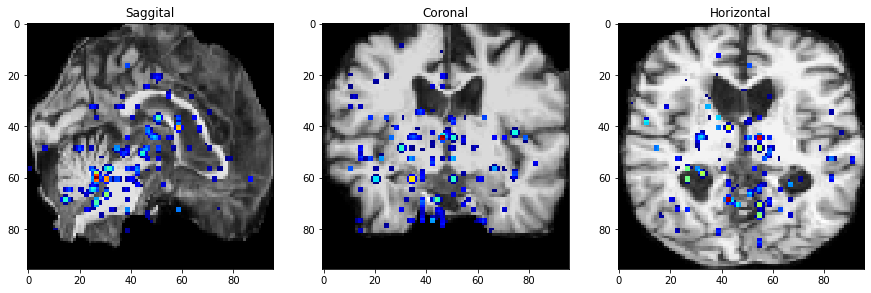

In [27]:
plot_vismap(original, resized_cam, alpha=0.4)

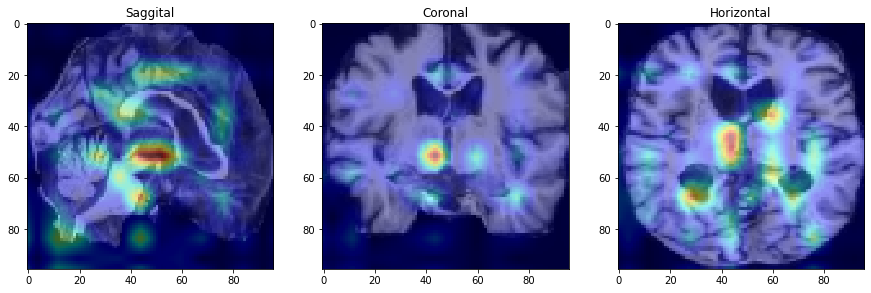

In [41]:
plot_vismap(original, resized_cam, alpha=0.4, masked=False)

## GBP

In [47]:
from src.models.resnet import *
from src.visualization.cams import GuidedBackpropRelu, GuidedReluModel

opt = Option()
opt.activation = GuidedBackpropRelu.apply

In [48]:
model = generate_model(
    model_depth=opt.model_depth,
    n_classes=opt.n_classes,
    n_input_channels=opt.n_input_channels,
    shortcut_type=opt.shortcut_type,
    conv1_t_size=opt.conv1_t_size,
    conv1_t_stride=opt.conv1_t_stride,
    no_max_pool=opt.no_max_pool,
    widen_factor=opt.resnet_widen_factor,
    activation=opt.activation,
)
model.load_state_dict(
    torch.load("./result/models/2021_03_02_1509/best_resnet_ep31-100_sd42_mae6.811.pth")
)
model.to(device)
guide = GuidedReluModel(model)

In [134]:
def run_gbp(guide, data):

    guide.eval()

    x, y = data
    device = next(guide.parameters()).device
    x.requires_grad = True
    output = guide.forward(x.to(device))
    output.backward()
    return guide.get_visual()


sample = run_gbp(guide, next(iterator))

In [135]:
from tqdm import tqdm

avg = np.zeros_like(sample)
for data in tqdm(sample_dl):
    avg += run_gbp(guide, data).cpu().numpy()

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [01:54<00:00,  6.11it/s]


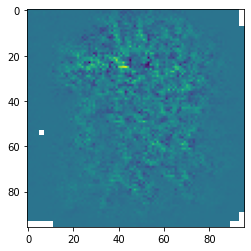

In [138]:
# avg /= 1400
plt.imshow(avg[:, 48, :])

In [137]:
plt.close()

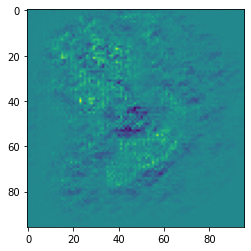

In [11]:
plt.imshow(avg[48, :, :])

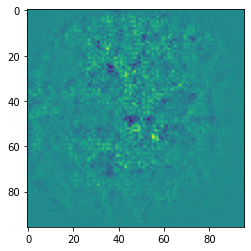

In [12]:
plt.imshow(avg[:, :, 48])

In [49]:
guide.eval()

x, y = next(iterator)
x, y = x.to(device), y.to(device)
x.requires_grad = True
output = guide.forward(x)
print(output, y)

output.backward()

tensor([[25.2659]], device='cuda:0', grad_fn=<AddmmBackward>) tensor([24.], device='cuda:0')


In [50]:
guided_img = guide.get_visual()

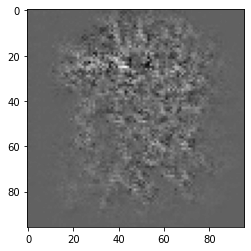

In [51]:
plt.imshow(guided_img[:, 48, :], cmap="gray")

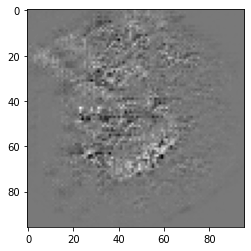

In [25]:
plt.imshow(guided_img[48, :, :], cmap="gray")

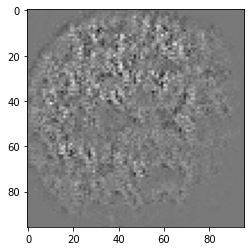

In [26]:
plt.imshow(guided_img[:, :, 48], cmap="gray")

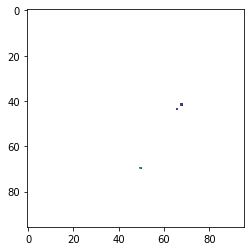

In [129]:
masked = np.ma.masked_where(np.isclose(guided_img, 0, atol=3e-3), guided_img)
masked = np.ma.masked_where(guided_img < 0.010, guided_img)
plt.imshow(masked[slc, :])

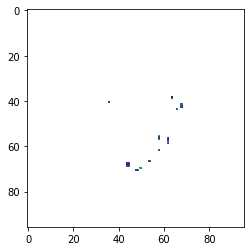

In [147]:
avg_masked = np.ma.masked_where(np.isclose(avg, 0, atol=3e-3), avg)
avg_masked = np.ma.masked_where(avg < 4, avg)
plt.imshow(avg_masked[slc, :])

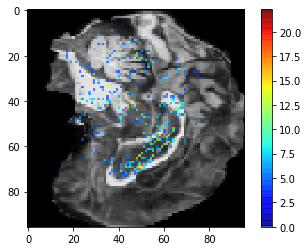

In [148]:
plt.imshow(original[slc, :, :], cmap="gray", interpolation="none")
# plt.imshow(guided_img[slc, :, :], cmap='jet', interpolation='nearest', alpha=.6, vmin=0)
# plt.imshow(masked[slc, :, :], cmap='jet', interpolation='nearest', alpha=.7, vmin=0)
plt.imshow(
    avg_masked[slc, :, :], cmap="jet", interpolation="nearest", alpha=0.7, vmin=0
)
plt.colorbar()

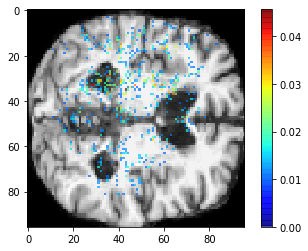

In [131]:
plt.imshow(original[:, :, slc], cmap="gray", interpolation="none")
# plt.imshow(guided_img[slc, :, :], cmap='jet', interpolation='nearest', alpha=.6, vmin=0)
plt.imshow(masked[:, :, slc], cmap="jet", interpolation="nearest", alpha=0.7, vmin=0)
plt.colorbar()

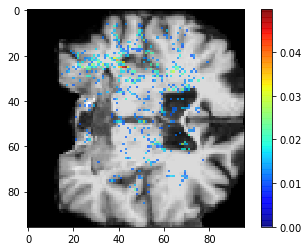

In [132]:
plt.imshow(original[:, slc, :], cmap="gray", interpolation="none")
plt.imshow(masked[:, slc, :], cmap="jet", interpolation="nearest", alpha=0.7, vmin=0)
plt.colorbar()
# plt.imshow(masked[:, slc, :], cmap='jet', interpolation='none', alpha=0.7)

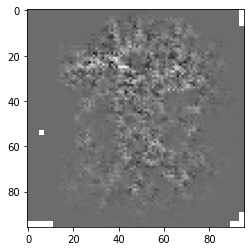

In [77]:
plt.imshow((guided_img * original)[:, slc, :], cmap="gray")

## Guided Grad-CAM

In [176]:
def run_ggcam(model, guide, data, cfg):

    model.eval()
    guide.eval()

    x, y = data
    device = next(guide.parameters()).device
    x.requires_grad = True

    cam = CAM(cfg, model)
    cam.register_hooks()

    output = model.forward(x.to(device))
    output.backward()

    cam.cam_over_layers()
    cam.remove_hook()

    cam_img = cam.resizing()[-1]

    gbp_output = guide.forward(x.to(device))
    gbp_output.backward()

    guided_img = guide.get_visual().numpy()

    return cam_img * guided_img

In [178]:
ggcam = run_ggcam(model, guide, data, cfg)

In [38]:
from tqdm import tqdm

avg = np.zeros_like(sample)
for data in tqdm(sample_dl):
    avg += run_ggcam(model, guide, data, cfg)

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [13:08<00:00,  1.13s/it]


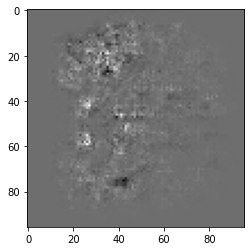

In [42]:
avg /= 1400
plt.imshow(avg[:, 48, :], cmap="gray")

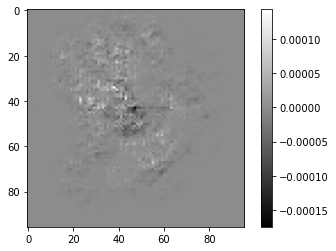

In [45]:
plt.imshow(avg[48, :, :], cmap="gray")
plt.colorbar()

In [47]:
avg[avg < 0].shape

(419724,)

In [48]:
plt.imshow(avg[:, :, 48])
plt.colorbar()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

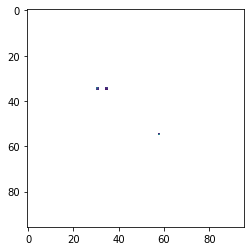

In [187]:
ggcam_masked = np.ma.masked_where(np.isclose(ggcam, 0, atol=3e-3), ggcam)
ggcam_masked = np.ma.masked_where(ggcam < 0.2, ggcam)
plt.imshow(ggcam_masked[slc, :])

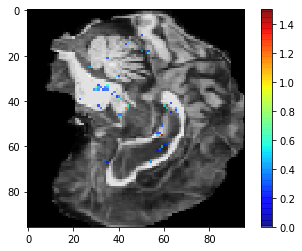

In [188]:
plt.imshow(original[slc, :, :], cmap="gray", interpolation="none")
plt.imshow(
    ggcam_masked[slc, :, :], cmap="jet", interpolation="nearest", alpha=0.7, vmin=0
)
plt.colorbar()